In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = pd.read_excel(r'D:/MedicalTest/GDM_data4.2.xlsx')
#print(data)  #(2065,117)

In [2]:
print('123')

123


In [3]:
data.describe()

,NO,PREGAGE,G,P,A,FERTILIT,TOTALWEE,FAMIHIS,IFAC,AC1HBV,...,RETINALH,CEPHALHE,INFECTI1,ANEMIA,WETLUNG,AFAS,SCLEREDE,CHROMOSO,ISCHEENC,MYOCARDI
count,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,...,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000
mean,1158.977240,29.887167,1.677966,0.169492,0.506538,1.159806,38.771719,1.261017,1.210654,1.065860,...,1.005811,1.013559,1.017433,1.041162,1.006295,1.004358,1.007264,1.002906,1.000484,1.004358
std,652.825016,3.925710,0.956123,0.403880,0.808195,0.366515,1.384841,0.694773,0.407872,0.248097,...,0.076027,0.115680,0.130911,0.198713,0.079113,0.065890,0.084939,0.053838,0.022006,0.065890
min,1.000000,18.000000,1.000000,0.000000,0.000000,1.000000,27.500000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,598.000000,27.000000,1.000000,0.000000,0.000000,1.000000,38.200000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1172.000000,29.000000,1.000000,0.000000,0.000000,1.000000,39.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1723.000000,32.000000,2.000000,0.000000,1.000000,1.000000,39.600000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2271.000000,44.000000,7.000000,3.000000,6.000000,2.000000,41.500000,4.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
data.columns

Index(['ENTRYBY', 'NO', 'PNAME', 'PREGAGE', 'LMP', 'G', 'P', 'A', 'FERTILIT',
       'EXPDATE',
       ...
       'RETINALH', 'CEPHALHE', 'INFECTI1', 'ANEMIA', 'WETLUNG', 'AFAS',
       'SCLEREDE', 'CHROMOSO', 'ISCHEENC', 'MYOCARDI'],
      dtype='object', length=117)

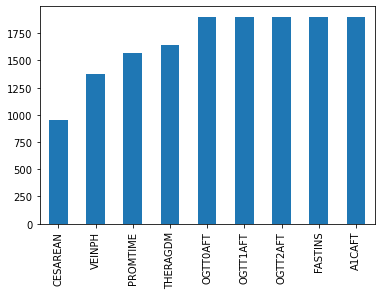

In [5]:
#可视化
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [6]:
data.isnull().sum()

ENTRYBY     0
NO          0
PNAME       0
PREGAGE     0
LMP         0
           ..
AFAS        0
SCLEREDE    0
CHROMOSO    0
ISCHEENC    0
MYOCARDI    0
Length: 117, dtype: int64

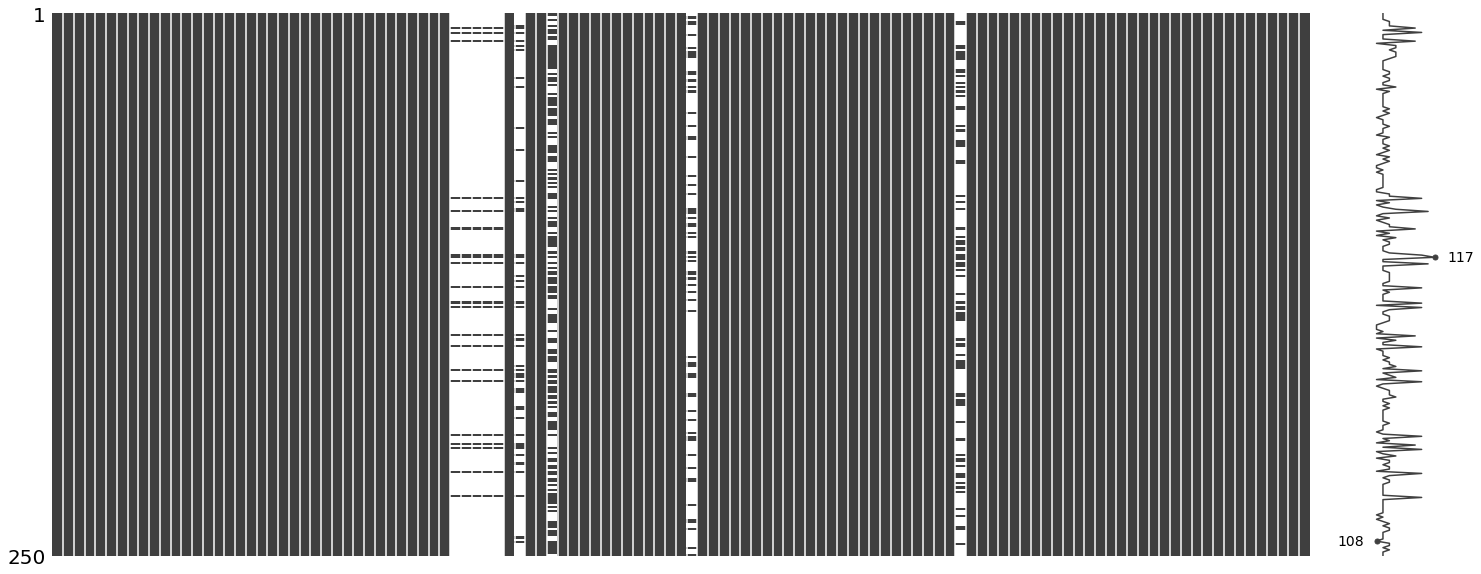

In [7]:
#可视化看下缺失值
msno.matrix(data.sample(250))

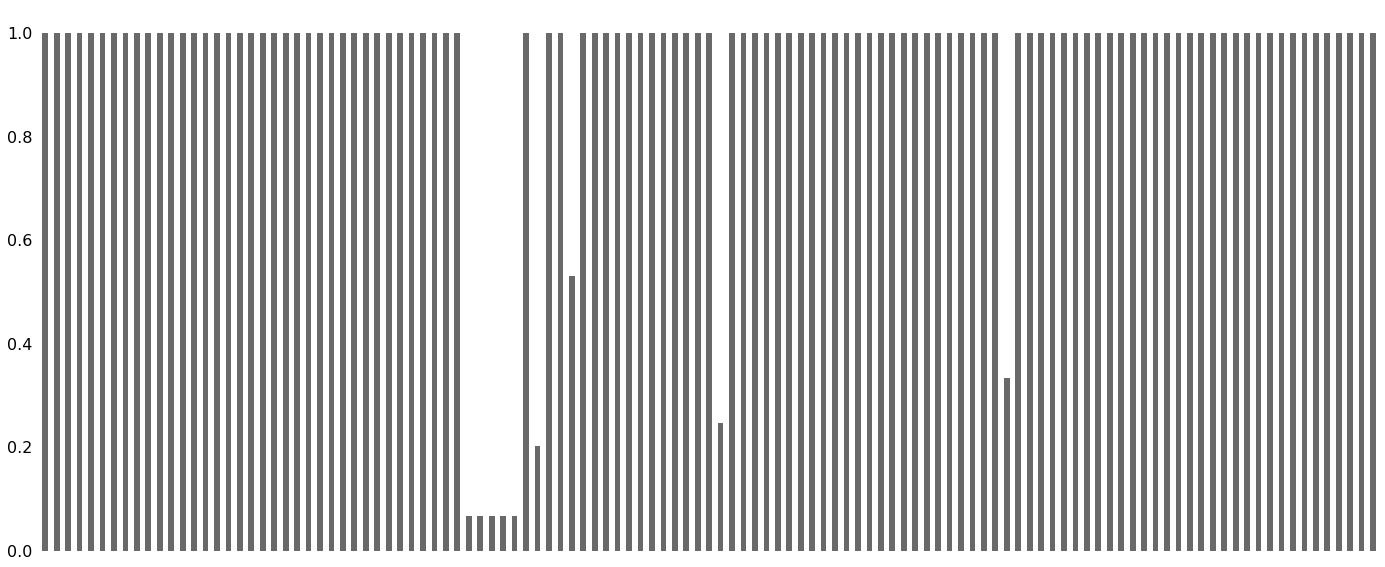

In [8]:
msno.bar(data.sample(1000))

In [9]:
#删去缺失值多的（母亲结局-剖宫产，如有脐静脉血pH，如有胎膜早破，如有GDM治疗方式,OGTT0空腹,OGTT1小时,OGTT2小时,RI,A1C）
'''
data_del = data.drop(['CESAREAN','VEINPH','PROMTIME','THERAGDM','OGTT0AFT','OGTT1AFT','OGTT2AFT','FASTINS','A1CAFT'],axis=1)
'''

"\ndata_del = data.drop(['CESAREAN','VEINPH','PROMTIME','THERAGDM','OGTT0AFT','OGTT1AFT','OGTT2AFT','FASTINS','A1CAFT'],axis=1)\n"

In [10]:
#data_del.shape

In [11]:
#G的分布
#data_del['G'].value_counts()

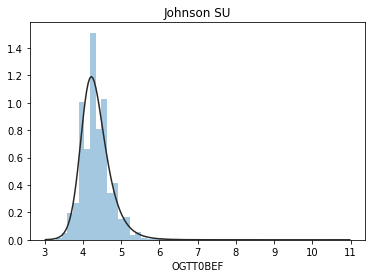

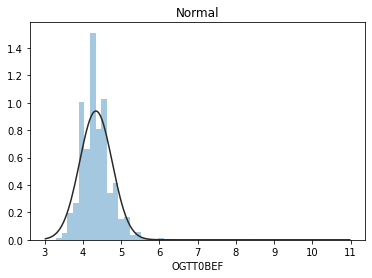

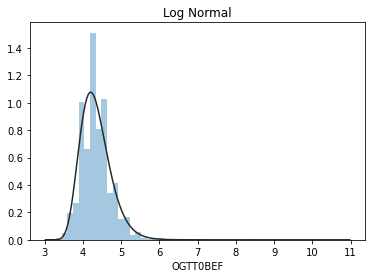

In [12]:
# 总体分布概况（无界约翰逊分布等）

import scipy.stats as st
y = data['OGTT0BEF']
plt.figure(1)
plt.title('Johnson SU')
#fit：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系
sns.distplot(y,kde=False,fit=st.johnsonsu)  #distplot画出分布线下的直方图，kde是否显示核密度估计
plt.figure(2)
plt.title('Normal')
sns.distplot(y,kde = False,fit = st.norm)   #正态分布
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y,kde = False,fit = st.lognorm)


Skewness: 2.786262
Kurtosis: 30.003673


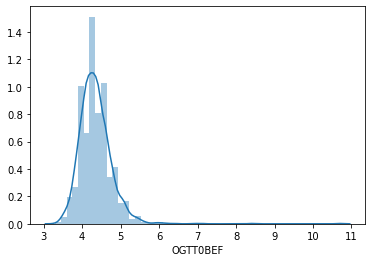

In [13]:
#查看skewness and kurtosi

sns.distplot(data['OGTT0BEF'])
print('Skewness: %f'% data['OGTT0BEF'].skew()) #偏度（skewness），是统计数据分布偏斜方向和程度的度量,右偏分布>0,左偏分布<0
print('Kurtosis: %f'% data['OGTT0BEF'].kurt()) #峰度（peakedness；kurtosis）又称峰态系数。表征概率密度分布曲线在平均值处峰值高低的特征数。
#峰度包括正态分布（峰度值=3），厚尾（峰度值>3），瘦尾（峰度值<3）。注意，个别的软件会将峰度值减3

In [14]:
# 特征nunique分布
'''
for cat_fea in data_del.columns:
    print(cat_fea + '的特征分布如下：')
    print('{}特征有个{}不同的值'.format(cat_fea,data_del[cat_fea].nunique()))
    print(data_del[cat_fea].value_counts())
'''

"\nfor cat_fea in data_del.columns:\n    print(cat_fea + '的特征分布如下：')\n    print('{}特征有个{}不同的值'.format(cat_fea,data_del[cat_fea].nunique()))\n    print(data_del[cat_fea].value_counts())\n"

In [15]:
#预产-末次月经(计算意义不大)
#data_del['EXPDATE-LMP']=data_del['EXPDATE']-data_del['LMP']
#分娩-末次月经
'''
data_del['REALDATE-LMP']=data_del['REALDATE']-data_del['LMP']
#分娩-预产
data_del['REALDATE-EXPDATE']=data_del['REALDATE']-data_del['EXPDATE']
#删掉两列年份，留下末次月经
data_del = data_del.drop(['EXPDATE','REALDATE'],axis=1)
'''

"\ndata_del['REALDATE-LMP']=data_del['REALDATE']-data_del['LMP']\n#分娩-预产\ndata_del['REALDATE-EXPDATE']=data_del['REALDATE']-data_del['EXPDATE']\n#删掉两列年份，留下末次月经\ndata_del = data_del.drop(['EXPDATE','REALDATE'],axis=1)\n"

In [16]:
#print(data.shape)  #2065,117

#data_del.shape

In [17]:
#删除NO个人编号，姓名,有无产后OGTT，产后OGTT时间，
'''
data_del = data_del.drop(['ENTRYBY','NO','PNAME','IFOGTTAF','OGTAFTDA'],axis=1)
'''

"\ndata_del = data_del.drop(['ENTRYBY','NO','PNAME','IFOGTTAF','OGTAFTDA'],axis=1)\n"

In [18]:
#data_del.shape

In [19]:
#查看当前数据内容
'''
pd.options.display.max_columns = None   #显示所有列
pd.options.display.max_rows = None       #显示所有行
data_del.head()
'''

'\npd.options.display.max_columns = None   #显示所有列\npd.options.display.max_rows = None       #显示所有行\ndata_del.head()\n'

In [20]:
#将相减日期带day的数据去掉day变成整型
'''
#data_del['EXPDATE-LMP']=data_del['EXPDATE-LMP'].astype('str').apply(lambda x:x[:-23]).astype('int')
data_del['REALDATE-LMP']=data_del['REALDATE-LMP'].astype('str').apply(lambda x:x[:-23]).astype('int')
data_del['REALDATE-EXPDATE']=data_del['REALDATE-EXPDATE'].astype('str').apply(lambda x:x[:-24]).astype('int')
'''

"\n#data_del['EXPDATE-LMP']=data_del['EXPDATE-LMP'].astype('str').apply(lambda x:x[:-23]).astype('int')\ndata_del['REALDATE-LMP']=data_del['REALDATE-LMP'].astype('str').apply(lambda x:x[:-23]).astype('int')\ndata_del['REALDATE-EXPDATE']=data_del['REALDATE-EXPDATE'].astype('str').apply(lambda x:x[:-24]).astype('int')\n"

In [21]:
#测OGTT时间减去末次月经时间
#测HbA1c时间减去末次月经时间
#剔除不在24-28周的数据
'''
data_del['OGTTDATE-LMP']=(data_del['OGTTDATE']-data_del['LMP']).astype('str').apply(lambda x:x[:-23]).astype('int')//7
data_del['A1CDATE-LMP']=(data_del['A1CDATE']-data_del['LMP']).astype('str').apply(lambda x:x[:-23]).astype('int')//7
data1 = data_del[data_del['OGTTDATE-LMP']>28]
data2 = data_del[data_del['OGTTDATE-LMP']<24]
sub1 = data1.add(data2)
#print(sub1.shape)  #(294, 106)
id1 = list(sub1.index.values)
#print(id1)
data_del = data_del.drop(data_del.index[id1])
#data_del.shape  #(1771, 105)

#c = []
#for i in range(1771):
#    c.append(i)
#print(c)
#data_del.reindex(index = c，method='ffill')

data_del.reset_index(drop=True, inplace=True)  #对数据索引重新排序
print(data_del.index)
data3 = data_del[data_del['A1CDATE-LMP']>28]
data4 = data_del[data_del['A1CDATE-LMP']<24]
sub2 = data3.add(data4)
print(sub2.shape)
id2 = list(sub2.index.values)
data_del = data_del.drop(data_del.index[id2])
data_del.shape
'''

"\ndata_del['OGTTDATE-LMP']=(data_del['OGTTDATE']-data_del['LMP']).astype('str').apply(lambda x:x[:-23]).astype('int')//7\ndata_del['A1CDATE-LMP']=(data_del['A1CDATE']-data_del['LMP']).astype('str').apply(lambda x:x[:-23]).astype('int')//7\ndata1 = data_del[data_del['OGTTDATE-LMP']>28]\ndata2 = data_del[data_del['OGTTDATE-LMP']<24]\nsub1 = data1.add(data2)\n#print(sub1.shape)  #(294, 106)\nid1 = list(sub1.index.values)\n#print(id1)\ndata_del = data_del.drop(data_del.index[id1])\n#data_del.shape  #(1771, 105)\n\n#c = []\n#for i in range(1771):\n#    c.append(i)\n#print(c)\n#data_del.reindex(index = c，method='ffill')\n\ndata_del.reset_index(drop=True, inplace=True)  #对数据索引重新排序\nprint(data_del.index)\ndata3 = data_del[data_del['A1CDATE-LMP']>28]\ndata4 = data_del[data_del['A1CDATE-LMP']<24]\nsub2 = data3.add(data4)\nprint(sub2.shape)\nid2 = list(sub2.index.values)\ndata_del = data_del.drop(data_del.index[id2])\ndata_del.shape\n"

In [22]:
#删去测OGTT时间，测HbA1c时间，末次月经时间
'''
data_del=data_del.drop(['OGTTDATE','A1CDATE','LMP'],axis=1)
'''
-----

SyntaxError: invalid syntax (<ipython-input-22-06a6c0a2c15b>, line 5)

In [23]:
###################################2021.6.16改进########################
import copy
#print(data.shape)   #2065,117
attri_del = ['PREGAGE','G','P','A','TOTALWEE','FAMIHIS','AC2NEPHR','AC3THALA','AC4OBESI','AC5G6PD','BWBEF','BMIBEFDE',
               'SBPBEFDE','DBPBEFDE','HB','PRONURIA','FPGBEF','OGTT0BEF','OGTT1BEF','OGTT2BEF','A1C','weight_change']
label_del = ['PIH','PREECLAM','PREMATUR','DISTRESS','LGA','IFLBW','HYPERBIL','PDA',
            'ASPHYXIA']#'ASD','VSD','ABRUPTIO']

###########孕期体重变化（新建该特征：孕期体重变化=临产体重-孕前体重）####################
data['weight_change'] = data['BWBEFDEL'] - data['BWBEF']
data_attribute_initial = copy.deepcopy(data[attri_del])
data_label = copy.deepcopy(data[label_del])

#########根据末次月经时间新建一个特征，春/夏/秋/冬#######################
#########根据分娩日期新建一个特征，春/夏/秋/冬###########################
def data_change_LMP_REALDATE(data1 = copy.deepcopy(data['LMP']),data2 = copy.deepcopy(data['REALDATE'])):
    for i in range(len(data1)):      #将末次月经时间新建一个特征，春/夏/秋/冬=1，2，3，4
        if 1<=data1[i].month and data1[i].month<=3:
            data1[i] = 1
        elif 4<=data1[i].month and data1[i].month<=6:
            data1[i] = 2
        elif 7<=data1[i].month and data1[i].month<=9:
            data1[i] = 3
        else:
            data1[i] = 4
    for i in range(len(data2)):      #将分娩日期新建一个特征，春/夏/秋/冬=1，2，3，4
        if 1<=data2[i].month and data2[i].month<=3:
            data2[i] = 1
        elif 4<=data2[i].month and data2[i].month<=6:
            data2[i] = 2
        elif 7<=data2[i].month and data2[i].month<=9:
            data2[i] = 3
        else:
            data2[i] = 4
    return data1,data2


#列名其实没变cancat后还是LMP和REALDATE
new_LMP,new_REALDATE = data_change_LMP_REALDATE()
#weight_change = data_change_weight()
data_attribute = pd.concat([data_attribute_initial,new_LMP,new_REALDATE],axis = 1)   
#print(data_attribute.shape)  #(2065,24),24个属性
#print(data_label.shape)    #(2065,12),12个标签

#print(data['LMP'])
#print(data['LMP'].value_counts())   1:812  2:154   3:636   4:782
#所有属性列
#ft_list = data_attribute.columns.tolist()
#len(ft_list)
#print(ft_list)
#ft_list2 = data_label.columns.tolist()
#print(ft_list2)

#以妊高症或先兆子痫作为预测变量时，不纳入该特征） SBPBEFDE，DBPBEFDE
data_attribute2 = copy.deepcopy(data_attribute.drop(['SBPBEFDE','DBPBEFDE'],axis=1))
#以早产作为预测变量时，不纳入该特征）   TOTALWEE
data_attribute3 = copy.deepcopy(data_attribute.drop(['TOTALWEE'],axis=1))



In [ ]:
print(data_attribute.columns)
print(data_attribute2.columns)
print(data_attribute3.columns)

In [ ]:
#可视化
missing = data_attribute.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
#开始分离属性和标签
#data_attribute存放属性，
'''
a = []
for i in (list(data_del.columns)):
    a.append(i)
    if i == 'DELIMODE':
        break
a.append('REALDATE-LMP')
a.append( 'REALDATE-EXPDATE')
a.append('OGTTDATE-LMP')
a.append('A1CDATE-LMP')
#print(a)
data_attribute = data_del[a]
print(data_attribute.shape)
'''

In [ ]:
#data_label存放标签
'''
b = []
for i in (list(data_del.columns[31:])):
    b.append(i)
    if i == 'MYOCARDI':
        break
#print(b)
b.append('PREECLAM')
data_label = data_del[b]
print(data_label.shape)
'''

In [ ]:
# 特征nunique分布
'''
for cat_fea in data_del.columns:
    print(cat_fea + '的特征分布如下：')
    print('{}特征有个{}不同的值'.format(cat_fea,data_del[cat_fea].nunique()))
    print(data_del[cat_fea].value_counts())
'''

In [24]:
##########################归一化##############################

ft_list_attri2 = data_attribute2.columns.tolist()
data_attribute_N2 = data_attribute2.copy(deep=True)
for i in ft_list_attri2:
    data_attribute_N2[i]=(data_attribute2[i] -data_attribute2[i].min())/(data_attribute2[i].max()-data_attribute2[i].min())
    
ft_list_attri3 = data_attribute3.columns.tolist()
data_attribute_N3 = data_attribute3.copy(deep=True)
for i in ft_list_attri3:
    data_attribute_N3[i]=(data_attribute3[i] -data_attribute3[i].min())/(data_attribute3[i].max()-data_attribute3[i].min())
    
ft_list_1 = data_attribute.columns.tolist()
data_attribute_N1 = data_attribute.copy(deep=True)
for i in ft_list_1:
    #if i not in category_feat: （还是选择全部数据归一化）
    data_attribute_N1[i]=(data_attribute[i] -data_attribute[i].min())/(data_attribute[i].max()-data_attribute[i].min())



In [ ]:
print(type(data_attribute2))
print(type(data_attribute_PIH_new))

In [ ]:
################相关性分析###################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''
#Correlation = pd.DataFrame(data_del[['PREECLAM','PIH','PREMATUR'
#        ,'ABRUPTIO','POLYHYDR','DISTRESS','FGR','LGA','SGA',
#    'MACROSOM','IFLBW','BABYBW','BABYH','HYPERBIL','PFO','ASD',
#                'VSD','PDA','ASPHYXIA','PATHOGLY']])
Correlation = data_attribute
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
'''


In [25]:
#分离二类标签和多类标签
calRoc=[]
calOther=[]
#y_tag = ['PREECLAM','PIH','PREMATUR','ABRUPTIO','POLYHYDR','DISTRESS','FGR','LGA','SGA','MACROSOM','IFLBW','BABYBW','BABYH','HYPERBIL','PFO','ASD','VSD','PDA','ASPHYXIA','PATHOGLY']
y_tag = ['PIH','PREECLAM','PREMATUR','DISTRESS','LGA','IFLBW','HYPERBIL','PDA',
            'ASPHYXIA']#'ASD','VSD','ABRUPTIO']
for cat_fea in y_tag:
    if data_label[cat_fea].nunique()==2:
        calRoc.append(cat_fea)
    else:
        calOther.append(cat_fea)
#print('需要计算ROC指标的标签有{num1}个'.format(num1=len(calRoc)))  #8个需要ROC的二分类标签
#print('需要编码处理的多分类标签有{num1}个'.format(num1=len(calOther))) #4个多分类的标签
#print(calRoc,calOther)

In [ ]:
#特征nunique分布,标签
for cat_fea in data_label[calRoc].columns:
    print(cat_fea + '的特征分布如下：')
    print('{}特征有个{}不同的值'.format(cat_fea,data_label[cat_fea].nunique()))
    print(data_label[cat_fea].value_counts())


###SMOTE https://www.cnblogs.com/june0507/p/11726492.html

In [ ]:
from sklearn.model_selection import train_test_split
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.5,random_state=42)
#X_smo, y_smo = smo.fit_sample(X, y)
'''
for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_smo, y_smo = smo.fit_resample(data_attribute2,data_label[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        elif i == 'PREMATUR':
            X_smo, y_smo = smo.fit_resample(data_attribute3,data_label[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        else:
            X_smo, y_smo = smo.fit_resample(data_attribute,data_label[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        print(Counter(y_smo))  #Counter({1: 2039, 2: 2039})
'''
'''    
#只改变训练集的SMOTE
for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2, data_label[calRoc])
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute3, data_label[calRoc])
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute, data_label[calRoc])
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        print(Counter(y_train))

    #print(y_test.shape,y_train.shape)
'''

In [ ]:
#特征nunique分布,标签
for cat_fea in pd.DataFrame(y_smo).columns:
    print(cat_fea + '的特征分布如下：')
    print('{}特征有个{}不同的值'.format(cat_fea,y_smo.nunique()))
    print(y_smo.value_counts())


In [ ]:
print(data_attribute[1])

In [72]:
#改进的单类F-score特征选择
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
#smo = SMOTE(sampling_strategy=0.3,random_state=42)
#sm = BorderlineSMOTE(sampling_strategy= 1,random_state = 42,kind = "borderline-1")
y = data_label
data_attribute_N1 = data_attribute.copy(deep=True)
import numpy as np
for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X = data_attribute_N2
        elif i == 'PREMATUR':
            X = data_attribute_N3
        else:
            X = data_attribute_N1

#y = data_label
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y[calRoc])
#整个数据上特征的平均值
X_total_average = X.mean()    #(24,)，24个特征的平均值
#print(X_total_average)
#print('**************************')
for i in data_attribute_N1:
    X_average = X_total_average[i]
    #print(i,X_average)

def F_score(X_total_average,X_df,y_df):
    #一个标签上少数类别的索引
    index_shao = y_df[y_df == 2].index.tolist()
    #一个标签上多数类别的索引
    index_duo = y_df[y_df == 1].index.tolist()
    #print(np.array(index_shao).shape)
    #print(index_duo)
    #print(X_df.loc[index])

    #少数类样本的特征的平均值
    X_df_shao_total = X_df.loc[index_shao].mean()
    #print('**************************')
    #print(X_df_shao_total)

    #多数类样本的特征的平均值
    X_df_duo_total = X_df.loc[index_duo].mean()
    #print(X_df_duo_total)

    #分子第一项
    a = X_df_shao_total - X_total_average
    a = [num*num for num in a]
    a = np.array(a)
    #print(a)

    #分子第二项
    b = X_df_duo_total - X_total_average
    b = [num*num for num in b]
    b = np.array(b)
    #print(b)

    #总的分子
    fenzi = a + b
    fenzi = (a+b).reshape(24,1)
    #print(fenzi)

    #分母第一项
    c = 1/(len(index_shao)-1)

    #分母第二项
    X_k_i = X_df.loc[index_shao]
    #print(X_k_i.shape)    #(35,34)
    #print(X_df_shao_total.shape)   #(34,)
    d = 0
    for k in X_k_i.index:
        #print((X_k_i).loc[k])
        a1 = np.array(X_k_i.loc[k]).reshape(24,1) - np.array(X_df_shao_total).reshape(24,1)
        a2 = [num*num for num in a1]
        a2 = np.array(a2)
        d+=a2

    #总的分母
    fenmu = c*d
    #print(fenmu)

    #总式子
    F = np.array(fenzi/fenmu)
    #print(F.type)
    #print(F)
    tezheng = X.columns.tolist()
    F = F.tolist()
    #print(F)
    F = [n for a in F for n in a]
    d = {tezheng[n]:F[n] for n in range(len(tezheng))}
    tmp = zip(d.values(),d.keys())
    s_d = sorted(tmp,reverse = True)  #(24,2)
    name_list = []
    for value,name in s_d:
        name_list.append(name)
        if len(name_list)>17:
            #print(name_list)
            break
    return s_d,fenzi,fenmu,name_list

#s_d_total = []
for i in y_df:
    s_d,fenzi,fenmu,name_list = F_score(X_total_average,X_df,y_df[i])
    print('{}标签的F值从大到小排序为:{}'.format(i,s_d))
    print('----------------------------------------------------')
    print('{}的特征选择为:{}'.format(i,name_list))
    print('****************************************************')
    if i == 'PIH':
        data_attribute_PIH = copy.deepcopy(data_attribute[name_list])
    elif i =='PREMATUR':
        data_attribute_PREMATUR = copy.deepcopy(data_attribute[name_list])
    elif i =='DISTRESS':
        data_attribute_DISTRESS = copy.deepcopy(data_attribute[name_list])
    elif i == 'LGA':
        data_attribute_LGA = copy.deepcopy(data_attribute[name_list])
    else:
        data_attribute_PDA = copy.deepcopy(data_attribute[name_list])

data_attribute_PIH_new = copy.deepcopy(data_attribute_PIH.drop(['SBPBEFDE','DBPBEFDE'],axis=1))
data_attribute_PREMATUR_new = copy.deepcopy(data_attribute.drop(['TOTALWEE'],axis=1))
'''
############################归一化################################################
ft_list_2 = data_attribute_PIH_new.columns.tolist()
data_attribute_PIH_N = data_attribute_PIH_new.copy(deep=True)
for i in ft_list_2:
    data_attribute_PIH_N[i]=(data_attribute_PIH_new[i] -data_attribute_PIH_new[i].min())/(data_attribute_PIH_new[i].max()-data_attribute_PIH_new[i].min())
    
ft_list_3 = data_attribute_PREMATUR_new.columns.tolist()
data_attribute_PREMATUR_N = data_attribute_PREMATUR_new.copy(deep=True)
for i in ft_list_3:
    data_attribute_PREMATUR_N[i]=(data_attribute_PREMATUR_new[i] -data_attribute_PREMATUR_new[i].min())/(data_attribute_PREMATUR_new[i].max()-data_attribute_PREMATUR_new[i].min())
    
ft_list_4 = data_attribute_DISTRESS.columns.tolist()
data_attribute_DISTRESS_N = data_attribute_DISTRESS.copy(deep = True)
for i in ft_list_4:
    data_attribute_DISTRESS_N[i]=(data_attribute_DISTRESS[i] -data_attribute_DISTRESS[i].min())/(data_attribute_DISTRESS[i].max()-data_attribute_DISTRESS[i].min())

ft_list_5 = data_attribute_LGA.columns.tolist()
data_attribute_LGA_N = data_attribute_LGA.copy(deep = True)
for i in ft_list_5:
    data_attribute_LGA_N = (data_attribute_LGA[i] -data_attribute_LGA[i].min())/(data_attribute_LGA[i].max()-data_attribute_LGA[i].min())

ft_list_6 = data_attribute_PDA.columns.tolist()
data_attribute_PDA_N = data_attribute_PDA.copy(deep = True)
for i in ft_list_6:
    data_attribute_PDA_N = (data_attribute_PDA[i] -data_attribute_PDA[i].min())/(data_attribute_PDA[i].max()-data_attribute_PDA[i].min())
'''    

PIH标签的F值从大到小排序为:[(inf, 'AC5G6PD'), (inf, 'AC2NEPHR'), (2.588586454961062, 'DBPBEFDE'), (1.6523366176054919, 'SBPBEFDE'), (0.3864120471380096, 'BMIBEFDE'), (0.20186496111727295, 'AC4OBESI'), (0.1798063702328958, 'BWBEF'), (0.1529189905958162, 'TOTALWEE'), (0.14460696817370375, 'HB'), (0.12067695123834035, 'weight_change'), (0.09611232299319834, 'FAMIHIS'), (0.08612872242828822, 'A'), (0.08046263704257436, 'G'), (0.0533570908611118, 'REALDATE'), (0.05160140616957972, 'LMP'), (0.04778586827413419, 'PRONURIA'), (0.03693449986245876, 'PREGAGE'), (0.024038066299720027, 'A1C'), (0.020358111413773403, 'AC3THALA'), (0.018244640944719233, 'OGTT2BEF'), (0.017652676552194567, 'P'), (0.0026380696498418594, 'OGTT1BEF'), (0.0011363323940226865, 'FPGBEF'), (0.00023538980899431484, 'OGTT0BEF')]
----------------------------------------------------
PIH的特征选择为:['AC5G6PD', 'AC2NEPHR', 'DBPBEFDE', 'SBPBEFDE', 'BMIBEFDE', 'AC4OBESI', 'BWBEF', 'TOTALWEE', 'HB', 'weight_change', 'FAMIHIS', 'A', 'G', 'REALDATE',

<ipython-input-72-36eaeb9b08a1>:86: RuntimeWarning: divide by zero encountered in double_scalars
  F = np.array(fenzi/fenmu)


'\n############################归一化################################################\nft_list_2 = data_attribute_PIH_new.columns.tolist()\ndata_attribute_PIH_N = data_attribute_PIH_new.copy(deep=True)\nfor i in ft_list_2:\n    data_attribute_PIH_N[i]=(data_attribute_PIH_new[i] -data_attribute_PIH_new[i].min())/(data_attribute_PIH_new[i].max()-data_attribute_PIH_new[i].min())\n    \nft_list_3 = data_attribute_PREMATUR_new.columns.tolist()\ndata_attribute_PREMATUR_N = data_attribute_PREMATUR_new.copy(deep=True)\nfor i in ft_list_3:\n    data_attribute_PREMATUR_N[i]=(data_attribute_PREMATUR_new[i] -data_attribute_PREMATUR_new[i].min())/(data_attribute_PREMATUR_new[i].max()-data_attribute_PREMATUR_new[i].min())\n    \nft_list_4 = data_attribute_DISTRESS.columns.tolist()\ndata_attribute_DISTRESS_N = data_attribute_DISTRESS.copy(deep = True)\nfor i in ft_list_4:\n    data_attribute_DISTRESS_N[i]=(data_attribute_DISTRESS[i] -data_attribute_DISTRESS[i].min())/(data_attribute_DISTRESS[i].max()-da

In [ ]:
print(y)

In [74]:
#传统的单类F-score特征选择
import numpy as np
def F_score_tradition(fenzi,fenmu):
     #一个标签上少数类别的索引
    index_shao = y_df[y_df == 2].index.tolist()
    #一个标签上多数类别的索引
    index_duo = y_df[y_df == 1].index.tolist()
    #print(np.array(index_shao).shape)
    #print(index_duo)
    #print(X_df.loc[index])

    #少数类样本的特征的平均值
    X_df_shao_total = X_df.loc[index_shao].mean()
    #print('**************************')
    #print(X_df_shao_total)

    #多数类样本的特征的平均值
    X_df_duo_total = X_df.loc[index_duo].mean()
    #print(X_df_duo_total)
    
    #分母第二个式子第一项
    e = 1/(len(index_duo) - 1)
    #分母第二个式子第二项
    X_k_i_2 = X_df.loc[index_duo]
    d_2 = 0
    for k in X_k_i_2.index:
        #print((X_k_i).loc[k])
        a1_ = np.array(X_k_i_2.loc[k]).reshape(24,1) - np.array(X_df_duo_total).reshape(24,1)
        a2_ = [num*num for num in a1_]
        a2_ = np.array(a2_)
        d_2+=a2_
    #分母第二项总
    fenmu_2 = e*d_2
    #分母总
    fenmu_tradition = fenmu + fenmu_2
    #分子总
    fenzi_tradition = copy.deepcopy(fenzi)
    #总式子
    F_tradition = np.array(fenzi_tradition/fenmu_tradition)
    #print(F.type)
    #print(F)
    tezheng_tradition = X.columns.tolist()
    F_tradition = F_tradition.tolist()
    #print(F)
    F_tradition = [n for a in F_tradition for n in a]
    d = {tezheng_tradition[n]:F_tradition[n] for n in range(len(tezheng_tradition))}
    tmp = zip(d.values(),d.keys())
    s_d_tradition = sorted(tmp,reverse = True)  #(24,2)
    return s_d_tradition

s_d_tradition = F_score_tradition(fenzi,fenmu)
for i in y_df:
    print('{}标签的传统F值从大到小排序为:{}'.format(i,s_d_tradition))
    print('----------------------------------------------------')

PIH标签的传统F值从大到小排序为:[(0.33587481051415463, 'TOTALWEE'), (0.06774705778901566, 'LMP'), (0.05533892556599875, 'A'), (0.053249198417426535, 'FAMIHIS'), (0.04712834255587777, 'OGTT1BEF'), (0.02978989682556104, 'G'), (0.025939364785324676, 'DBPBEFDE'), (0.024269416665132333, 'BMIBEFDE'), (0.014854865408787154, 'FPGBEF'), (0.01425151530569602, 'SBPBEFDE'), (0.013936519782739808, 'PREGAGE'), (0.010085175889712156, 'PRONURIA'), (0.009740556377305263, 'HB'), (0.009164477298135413, 'OGTT2BEF'), (0.008211126041252601, 'REALDATE'), (0.007806174771326685, 'AC5G6PD'), (0.0070919996019997555, 'OGTT0BEF'), (0.005965966795089037, 'BWBEF'), (0.005353681023945463, 'AC2NEPHR'), (0.0037865871670300197, 'A1C'), (0.003225844524607842, 'AC3THALA'), (0.0016037267126421438, 'P'), (0.0013580619448111504, 'AC4OBESI'), (0.0012134820764475977, 'weight_change')]
----------------------------------------------------
PREMATUR标签的传统F值从大到小排序为:[(0.33587481051415463, 'TOTALWEE'), (0.06774705778901566, 'LMP'), (0.0553389255659

In [ ]:
#针对传统F-score和改进的F-score画图比较
import matplotlib.pyplot as plt
X_ = [1,2,3,4,5]
y1 = [4,3.2,1.6,0.2,0.17]
y2 = [0.7,0.5,1.2,0.13,0.14]
plt.figure(figsize = (5,5))
plt.plot(X_,y1,color = 'blue',label = '改进F-core',linestyle = '-')
plt.plot(X_,y2,color = 'navy',label = '传统F-score',linestyle = '--')
plt.xlim([0,5])
plt.ylim([0,5])
plt.xlabel('PIH的两种F-score比较')
plt.ylabel('F-score值')
plt.legend(loc ='upper right')
plt.show()

In [27]:
#数据分离训练集，验证集
def data_separate(initial_data2,y):
    train_X,test_X,train_y,test_y = train_test_split(initial_data2,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1)
    train_X.shape,test_X.shape,train_y.shape,test_y.shape

    X_train = train_X.astype(np.int64)
    y_train = train_y
    test_X = test_X.astype(np.int64)

    #因为取训练集，验证集时打乱了顺序，所以重新排序
    X = X_train.sort_index()
    y = y_train.sort_index()
    test_X = test_X.sort_index()
    y_test = test_y.sort_index()

    
    #将y中二分类的负例的2变成0，方便AUC的计算
    y_roc = data_label.copy(deep = True)
    y_roc.index = range(len(y_roc))
    #print(y_test_roc)
    '''
    for i in y_roc[calRoc]:
        for index,item in enumerate(y_roc[i]):
            if item == 2:
                y_roc[i][index] = 0
                #print(y_test_roc[i][index])
    #print(y_test_roc[calRoc])
    '''
    return (X_train,y_train,test_X,y_test)  


#将y中二分类的负例的2变成0，方便AUC的计算
def y_2change_0(data_label):
    y_roc = data_label.copy(deep = True)
    y_roc.index = range(len(y_roc))
    #print(y_test_roc)

    for i in y_roc[calRoc]:
        for index,item in enumerate(y_roc[i]):
            if item == 2:
                y_roc[i][index] = 0
    return y_roc
#print(y_roc[calRoc])


In [ ]:
#特征nunique分布,标签
for cat_fea in y[calRoc].columns:
    print(cat_fea + '的特征分布如下：')
    print('{}特征有个{}不同的值'.format(cat_fea,y[cat_fea].nunique()))
    print(y_test[cat_fea].value_counts())

In [ ]:
#神经网络修改前
'''
    for i in y.columns:
        if i in calRoc:
            if i == 'PIH' or i == 'PREECLAM':
                X_train,y_train,test_X,y_test = data_separate(data_attribute2,y)
                model = Sequential()
                model.add(Dense(22,input_shape = (22,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            elif i == 'PREMATUR':
                X_train,y_train,test_X,y_test = data_separate(data_attribute3,y)
                model = Sequential()
                model.add(Dense(23,input_shape = (23,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            else:
                X_train,y_train,test_X,y_test = data_separate(data_attribute_N1,y)
                model = Sequential()
                model.add(Dense(24,input_shape = (24,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
'''

In [ ]:
'''
for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2, data_label[calRoc])
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute3, data_label[calRoc])
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute, data_label[calRoc])
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
'''

In [28]:
#处理二分类标签
from keras.models import Sequential
from keras.layers import  Dense,Dropout,Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
import numpy as np
from keras import optimizers
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import pandas as pd
from keras import regularizers
a = []
predlist = []


def neural_network_2fenlei(b,c):
    b = 0
    c = 0
    for i in y.columns:
        if i in calRoc:
            if i == 'PIH' or i == 'PREECLAM':
                X_train,y_train,test_X,y_test = data_separate(data_attribute_N2,y)
                y_test = y_test[i]
                X_train, y_train = sm.fit_resample(X_train,y_train[i])
                model = Sequential()
                model.add(Dense(22,input_shape = (22,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            elif i == 'PREMATUR':
                X_train,y_train,test_X,y_test = data_separate(data_attribute_N3,y)
                y_test = y_test[i]
                X_train, y_train = sm.fit_resample(X_train,y_train[i])
                model = Sequential()
                model.add(Dense(23,input_shape = (23,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            else:
                X_train,y_train,test_X,y_test = data_separate(data_attribute_N1,y)
                y_test = y_test[i]
                X_train, y_train = sm.fit_resample(X_train,y_train[i])
                model = Sequential()
                model.add(Dense(24,input_shape = (24,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            #model.summary()
            #sgd = optimizers.SGD(lr = 0.6,momentum=0.9)
            model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'] )
            model.fit(X_train,y_train,validation_data = (test_X,y_test),epochs = 20,batch_size = 50 )
            pred = model.predict(test_X)
            #计算F1-score
            #predlist.append(pred)
            #b = b + float(metrics.f1_score(y_test[i], pred))
            #c+=1
            #print(i,'Precision',metrics.precision_score(y_test[i], pred))
            #print(i,'Recall',metrics.recall_score(y_test[i], pred))
            #print(i,'f1_score',metrics.f1_score(y_test[i], pred))
            #计算ROC
            #pred = [0 for i in pred if i.isnull()]
            #pred = [int(i) for i in pred ]
            #print(pred)
            b = b + (roc_auc_score(y_test,pred))
            c+=1
            fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
            #print(fpr)
            #print(tpr)
            #print(thresholds)
            #print(metrics.auc(fpr, tpr))
            print(i,'AUC 的值为:',roc_auc_score(y_test,pred))
            with open('D:\jupyter\genetic algorithm\One_label.txt', 'a') as f:
                f.writelines("%s的AUC为%s\n" % (i,roc_auc_score(y_test,pred)))
            if c == 5:
                with open('D:\jupyter\genetic algorithm\One_label.txt', 'a') as f:
                    f.writelines("-------------------------------------------\n")
    #return('AUC的平均值为 %.8f'%(float(b/c)))
    return(float(b/c))

    #print('***********************')
    #print('f1的平均值为 %.8f'%(float(b/c)))
    #print('***********************')
    #predlist = np.array(predlist)
    #predlist = predlist.reshape(13,353)
    #predlist = np.transpose(predlist)
    #print(np.array(predlist).shape)
    #print(predlist)
    #df = pd.DataFrame(predlist)
    #df.columns = calRoc
    #print(df)
            #print(y_test[i].values.tolist(),pred.shape)
            #scores = model.evaluate(test_X,y_test[i],verbose = 0)
            #a.append([i,scores[1]])
    #print(a)

In [ ]:
print(len(pred))

In [29]:
#编码
from sklearn.model_selection import train_test_split
X = data_attribute_N1
y = data_label

'''
##################排名靠后的10个特征取出#################
initial_zero_feature = []
for i in s_d[-10:]:
    initial_zero_feature.append(i[1])
#print(initial_zero_feature)

initial_data = X.copy(deep = True)
initial_data.loc[:,initial_zero_feature] = 0
#print(initial_data)
'''
########################编码#####################################
#pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目,DNA_SIZE为编码长度
POP_SIZE = 10
DNA_SIZE = len(X.columns)
def incoding(POP_SIZE,DNA_SIZE):
    #print(DNA_SIZE)   #24
    #np.random.seed(1)
    pop = pd.DataFrame(np.random.randint(2,size = (POP_SIZE,DNA_SIZE)))
    #print(pop.shape)  #(10，24)
    #print(type(pop))

    #print(pop)

    #将随机初始化的特征组合中为0的列数取出来
    list_location = []
    location = 0
    for i in range(len(pop)):
        tmp = []
        for j in range(24):
            if pop[j][i] == 0:
                tmp.append(location)
            location+=1
        location = 0
        list_location.append(tmp)
    #print(list_location)
    return(pop,list_location)

In [ ]:
pop,list_location = incoding(10,5)
print(list_location)

**参数replace**
用来设置是否可以取相同元素：
True表示可以取相同数字；
False表示不可以取相同数字。
默认是True

### 遗传算法参考:https://blog.csdn.net/ha_ha_ha233/article/details/91364937

In [30]:
#选择
import copy
#fitness = copy.deepcopy(list_auc)

def select(fitness):
    idx = np.random.choice(np.arange(20),size = 10,replace = False,
                          p = (fitness)/(np.array(fitness).sum()))
    return idx

#choice_index = np.sort(select(pop,fitness))
#pop_choice = pop.iloc[choice_index]
#print(pop.iloc[choice_index].index = range(8)
#pop_choice.index = range(8)
#print(pop_choice)

In [31]:
#交叉、变异

def mutation(child,MUTATION_RATE):
    np.random.seed(None)
    if np.random.rand() < MUTATION_RATE:        #以MUTATION_RATE的概率进行变异
        mutate_point = np.random.randint(0,DNA_SIZE)    #随机产生一个实数，代表要变异基因的位置
        child[mutate_point] = child[mutate_point]^1     #将变异点的二进制反转
    return child

def crossover_and_mutation(pop_choice,CROSSOVER_RATE):
    np.random.seed(None)
    new_pop = []
    for i in range(len(pop_choice)): #遍历种群中每个个体，将该个体作为父亲
        father = pop_choice.iloc[i]
        child = father.copy(deep = True)         #孩子先得父亲的全部基因（这里一串二进制的那些1，0成为基因）
        if np.random.rand() < CROSSOVER_RATE:    #产生子代不是必然发生交叉，而是以一定概率发生交叉
            mother = pop_choice.iloc[np.random.randint(POP_SIZE)]   #在种群中选择另一个个体，并将该个体作为母亲
            cross_points = np.random.randint(low = 0,high = DNA_SIZE)   #随机产生交叉的点
            child[cross_points:] = mother[cross_points:]         #孩子得到位于交叉点后的母亲的基因
        child = mutation(child,MUTATION_RATE = 0.05)     #每个后代有一定的几率发生变异
        new_pop.append(child)
    return new_pop



In [ ]:
##########################主程序#########################
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.3,random_state=42)
sm = BorderlineSMOTE(sampling_strategy= 1,random_state = 42,kind = "borderline-1")
with open('D:\jupyter\genetic algorithm\zhongqun.txt', 'a') as f:
    f.seek(0)
    f.truncate()  #清空文件
with open('D:\jupyter\genetic algorithm\One_label.txt', 'a') as f:
    f.seek(0)
    f.truncate()  #清空文件
with open('D:\jupyter\genetic algorithm\pop_choice.txt', 'a') as f:
    f.seek(0)
    f.truncate()  #清空文件
POP_SIZE = 10
DNA_SIZE = len(X.columns)
list_auc = []
b = 0
c = 0
y = y_2change_0(data_label)          #将负类标签2变为0方便计算AUC
#编码
pop,list_location = incoding(POP_SIZE,DNA_SIZE)         #随机生成的新种群pop:10X24 ，list_location存放为0的属性的列索引
#初始化
for i in list_location:
    initial_data2 = data_attribute_N1.copy(deep = True)
    initial_data2.iloc[:,i] = 0           #新个体属性为0的列置0
    X_train,y_train,test_X,y_test=data_separate(initial_data2,y)    #分训练集，测试集
    AUC_average = neural_network_2fenlei(b,c)      #一次计算5个二分类标签的平均值
    list_auc.append(AUC_average)                   #将平均值作为个体存储起来作为种群,每个值代表自己的适应度
fitness = copy.deepcopy(list_auc)                 #AUC作为适应度函数  10个
#choice_index = np.sort(select(fitness_initial))    #第一次选择的索引
#pop_choice = pop.iloc[choice_index]           #第一次选择的整个种群数据
pop_choice = pop #(10,24)
#pop_choice.index = range(10)                   #第一次选择的整体数据重置索引
print('初始化适应度AUC的值为:{}'.format(fitness))
#选择变异遗传
for i in range(2):  #n_genertions为迭代次数
    list_auc = []
    new_pop = pd.DataFrame(crossover_and_mutation(pop_choice,CROSSOVER_RATE = 0.8))  #种群通过交叉变异产生后代，child 10个，father 10个
    new_pop.index = range(10)
    #将随机初始化的特征组合中为0的列数取出来
    list_location = []
    location = 0
    for j in range(len(new_pop)):
        tmp = []
        for k in range(new_pop.shape[1]):
            if new_pop[k][j] == 0:
                tmp.append(location)
            location+=1
        location = 0
        list_location.append(tmp)
        
    for u in list_location:                #对遗传变异的新个体重新将列号为0的列置0
        initial_data3 = data_attribute_N1.copy(deep = True)
        initial_data3.iloc[:,u] = 0
        X_train,y_train,test_X,y_test=data_separate(initial_data3,y)    #分训练集，测试集
        AUC_average = neural_network_2fenlei(b,c)      #一次计算12个二分类标签的平均值
        list_auc.append(AUC_average)                   #将平均值作为个体存储起来作为种群,每个值代表自己的适应度
    #fitness = copy.deepcopy(list_auc)                 #AUC作为适应度函数
    fitness.extend(list_auc)
    choice_index = np.sort(select(fitness))        #需要筛选的10个索引
    fitness = copy.deepcopy(list_auc)
    sum_pop = pd.concat([pop,new_pop],axis = 0)    #拼接20个个体以便按索引筛选出10个
    sum_pop.index = range(20)
    pop_choice = pd.DataFrame(sum_pop).iloc[choice_index]    #筛选出来新种群（10个个体）
    pd.set_option('display.max_columns', None)
    with open('D:\jupyter\genetic algorithm\pop_choice.txt', 'a') as f:
        f.writelines("第%s迭代的种群为%s\n" %(i+1,pop_choice))
        f.writelines('----------------------\n')
    pop_choice.index = range(10)             #索引重新排序
    pop = copy.deepcopy(new_pop)              #保证下次拼接正确
    print('第{}次迭代的AUC值为:{}'.format(i+1,fitness))
    with open('D:\jupyter\genetic algorithm\zhongqun.txt', 'a') as f:
        f.writelines('------------------------,第%s次迭代的种群为\n'%(i+1))
        f.writelines("%s\n" % l for l in fitness)
        f.writelines('------------------------\n')
'''
    if i == 0:
        fitness.extend(fitness)   #20个
    else:
        fitness_prev = copy.deepcopy(list_auc)
        fitness.extend(fitness_prev)
    choice_index = np.sort(select(fitness))        #按概率选出比较好的个体的编号
    #fitness_prev = copy.deepcopy(list_auc)
    pop_choice = pd.DataFrame(new_pop).iloc[choice_index]           #第二次选择的整个种群数据
    pop_choice.index = range(10)                   #第二次选择的整体数据重置索引
    print('第{}次迭代的AUC值为:{}'.format(i,fitness))                #输出每次迭代的种群AUC值
    #fitness = []
'''

In [ ]:

#print(fitness).shape)
print(list_auc)

In [ ]:
#将得到的最优的特征组合中为0的列数取出来
pop2 = [1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0]
list_location2 = []
location2 = 0

tmp = []
for i in range(24):
    if pop2[i] == 0:
        tmp.append(location2)
    location2+=1
location2 = 0
list_location2.append(tmp)

for i in list_location2:
    initial_data3 = data_attribute_N1.copy(deep = True)
    initial_data3.iloc[:,i] = 0           #新个体属性为0的列置0
X_train,y_train,test_X,y_test=data_separate(initial_data3,y)    #分训练集，测试集
AUC_average = neural_network_2fenlei(b,c)      #一次计算4个二分类标签的平均值


In [ ]:
for i in list_location2:
    print(i)

第4次迭代的AUC值为:[0.6527218307315887, 0.6618442316184108, 0.6030990649725905, 0.54636816200444, 0.6387875818858546, 
             0.5188032514946272, 0.5692237285581984, 0.5074663362954401, 0.5971174279913753, 0.6002733994737316]

#### https://blog.csdn.net/q6q6q/article/details/109345180  写入文件、保存

keras的回归模型:https://blog.csdn.net/ukakasu/article/details/80061623


In [ ]:
#处理多分类标签
'''
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import pyplot
import pandas as pd
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

X = X_train
y = y_train

X = X.sort_index()
y = y.sort_index()
test_X = test_X.sort_index()
y_test = test_y.sort_index()
for i in y.columns:
    if i in calOther:
        model = Sequential()
        model.add(Dense(34,input_shape = (1412,34),activation = 'relu'))
        model.add(Dense(8,activation = 'relu'))
        model.add(Dense(1))  
        #没有激活函数用于输出层，因为这是一个回归问题，我们希望直接预测数值，而不需要采用激活函数进行变换
        model.compile(loss = 'mean_squared_error',optimizer = 'Adam')
        #early stopping
        early_stopping = EarlyStopping(monitor = 'val_loss',patience = 20,verbose = 2)
        #训练
        if i == 'BABYH':   #婴儿身长MSE表现不好，单独训练
            history = model.fit(X,y[i],epochs = 200,batch_size = 20,validation_data = (test_X,y_test[i]),verbose = 2,shuffle = False,callbacks = [early_stopping])
        else:    
            history = model.fit(X,y[i],epochs = 50,batch_size = 20,validation_data = (test_X,y_test[i]),verbose = 2,shuffle = False,callbacks = [early_stopping])
        #loss曲线
        pyplot.plot(history.history['loss'],label = 'train')
        pyplot.plot(history.history['val_loss'],label = 'test')
        pyplot.title(i)
        pyplot.legend()
        pyplot.show()
        #预测
        yhat = model.predict(test_X)
        #计算MSE
        mse = mean_squared_error(y_test[i],yhat)
        print(i,'Test MSE : %.3f' %mse)
'''

### SVM理解及公式：https://cloud.tencent.com/developer/article/1169178 
### SVM实现参考:https://blog.csdn.net/weixin_41803874/article/details/83245051 
### SVM公式 https://www.cnblogs.com/Mjerry/p/9751519.html

In [ ]:
'''
#SVM(二分类处理)+SMOTE
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import model_selection
import numpy as np
from sklearn import metrics
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.3,random_state=42)
sm = BorderlineSMOTE(sampling_strategy= 1,random_state = 42,kind = "borderline-1")
def svm_train(i,train_X,test_X,train_y,test_y):
    """
    支持向量机
    svc二分类
    scr曲线你和函数回归
    kernel='linear'时，为线性核，C越大分类效果越好，但有可能会过拟合（defaul C=1）
    kernel='rbf'时（default），为高斯核，gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但有可能会过拟合。
    decision_function_shape='ovr'时，为one v rest，即一个类别与其他类别进行划分，
    decision_function_shape='ovo'时，为one v one，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。
    """
    clf = svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced')  #线性分类器
    #clf = svm.SVC(C = 0.8,kernel = 'rbf',gamma = 0.5,decision_function_shape = 'ovr',class_weight = 'balanced')#高斯核分类器
    #clf = svm.SVC(C = 0.08,kernel = 'poly',decision_function_shape = 'ovr',degree=8,class_weight = 'balanced')   #多项式核
    

    clf.fit(train_X,train_y)

    #计算准确率
    #print('训练集准确率：')
    #print(clf.score(train_X,train_y)) # 训练集准确率
    #print('测试集准确率:')
    #print(clf.score(test_X,test_y))  # 测试集准确率
    
    #计算F1
    pred = clf.predict(test_X)
    #print(i,'Precision',metrics.precision_score(y_test[i], pred))
    #print(i,'Recall',metrics.recall_score(y_test[i], pred))
    #print(i,'f1_score',metrics.f1_score(y_test[i], pred))
    #计算AUC
    #pred = [int(i) for i in pred ]
    fpr,tpr,thresholds = metrics.roc_curve(test_y,pred)
    #画图
    plt.figure(figsize = (5,5))
    plt.plot(fpr,tpr,color = 'darkorange',lw = 2,label = 'ROC curve (area = %2f)'%roc_auc_score(test_y,pred))
    plt.plot([0,1],[0,1],color = 'navy',lw = 2,linestyle = '--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc = 'lower right')
    plt.show()
    #print('AUC 的值为:',roc_auc_score(test_y,pred))
    print('{}的预测值为：{}'.format(i,pred))
    e = 0
    for j in pred:
        if j == 0:
            e+=1
    print('{}的负例占比为:{}'.format(i,e/len(pred)))
    return roc_auc_score(test_y,pred)
if __name__ == "__main__":
    y = y_2change_0(data_label[calRoc])
    #X_train,y_train,test_X,y_test = data_separate(data_attribute_N1,y)
    print('start...')
    a = 0
    b = 0
    for i in data_label.columns:
        if i in calRoc:
            if i == 'PIH':
                X_train,y_train,test_X,y_test = data_separate(data_attribute_PIH_new, y)
                y_test = y_test[i]
                X_train, y_train = sm.fit_resample(X_train,y_train[i])
            elif i == 'PREMATUR': 
                X_train,y_train,test_X,y_test = data_separate(data_attribute_PREMATUR, y)
                y_test = y_test[i]
                X_train, y_train = sm.fit_resample(X_train,y_train[i])
            elif i == 'DISTRESS':
                X_train,y_train,test_X,y_test = data_separate(data_attribute_DISTRESS, y)
                y_test = y_test[i]
                X_train, y_train = sm.fit_resample(X_train,y_train[i])
            elif i == 'LGA':
                X_train,y_train,test_X,y_test = data_separate(data_attribute_LGA, y)
                y_test = y_test[i]
                X_train, y_train = sm.fit_resample(X_train,y_train[i])
            else:
                X_train,y_train,test_X,y_test = data_separate(data_attribute_PDA, y)
                y_test = y_test[i]
                X_train, y_train = sm.fit_resample(X_train,y_train[i])
            AUC = svm_train(i,X_train,test_X,y_train,y_test)
            
            print('数据{}的AUC为{}'.format(i,AUC))
            a = a + AUC
            b+=1
            print('-----------------------')

    print('***********************')
    print('AUC的平均值为 %.8f'%(float(a/b)))
    print('***********************')
'''


start...


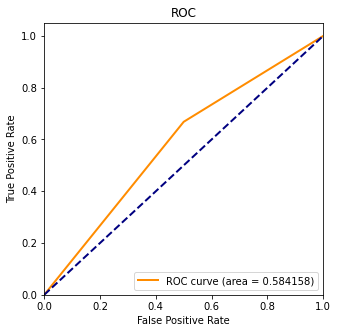

PIH的预测值为：[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0
 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1
 1 1 0 1 1 1 1 0

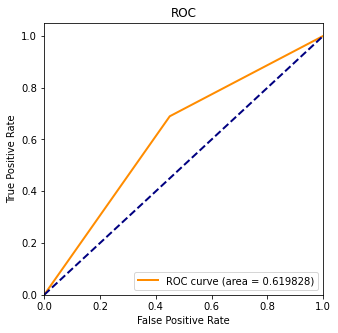

PREMATUR的预测值为：[0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0
 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1
 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1
 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1
 1 1 0 1 1 

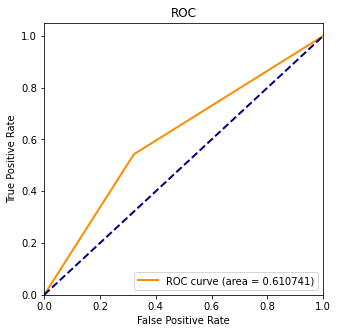

DISTRESS的预测值为：[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 

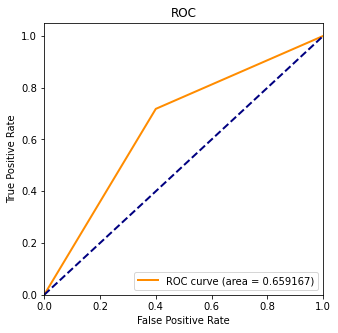

LGA的预测值为：[1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0
 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1

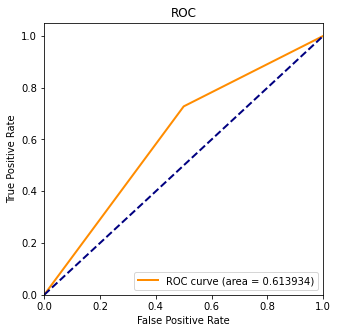

PDA的预测值为：[0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1
 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0

In [32]:
#无smote的SVM
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import model_selection
import numpy as np
from sklearn import metrics
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.3,random_state=42)
sm = BorderlineSMOTE(sampling_strategy= 1,random_state = 42,kind = "borderline-1")
def svm_train(i,train_X,test_X,train_y,test_y):
    """
    支持向量机
    svc二分类
    scr曲线你和函数回归
    kernel='linear'时，为线性核，C越大分类效果越好，但有可能会过拟合（defaul C=1）
    kernel='rbf'时（default），为高斯核，gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但有可能会过拟合。
    decision_function_shape='ovr'时，为one v rest，即一个类别与其他类别进行划分，
    decision_function_shape='ovo'时，为one v one，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。
    """
    clf = svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced')  #线性分类器
    #clf = svm.SVC(C = 0.8,kernel = 'rbf',gamma = 0.5,decision_function_shape = 'ovr',class_weight = 'balanced')#高斯核分类器
    #clf = svm.SVC(C = 0.08,kernel = 'poly',decision_function_shape = 'ovr',degree=8,class_weight = 'balanced')   #多项式核
    

    clf.fit(train_X,train_y[i])

    #计算准确率
    #print('训练集准确率：')
    #print(clf.score(train_X,train_y)) # 训练集准确率
    #print('测试集准确率:')
    #print(clf.score(test_X,test_y))  # 测试集准确率
    
    #计算F1
    pred = clf.predict(test_X)
    #print(i,'Precision',metrics.precision_score(y_test[i], pred))
    #print(i,'Recall',metrics.recall_score(y_test[i], pred))
    #print(i,'f1_score',metrics.f1_score(y_test[i], pred))
    #计算AUC
    #pred = [int(i) for i in pred ]
    fpr,tpr,thresholds = metrics.roc_curve(test_y[i],pred)
    #画图
    plt.figure(figsize = (5,5))
    plt.plot(fpr,tpr,color = 'darkorange',lw = 2,label = 'ROC curve (area = %2f)'%roc_auc_score(test_y[i],pred))
    plt.plot([0,1],[0,1],color = 'navy',lw = 2,linestyle = '--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc = 'lower right')
    plt.show()
    #print('AUC 的值为:',roc_auc_score(test_y,pred))
    print('{}的预测值为：{}'.format(i,pred))
    print(test_y)
    e = 0
    for j in pred:
        if j == 0:
            e+=1
    print('{}的负例占比为:{}'.format(i,e/len(pred)))
    return roc_auc_score(test_y[i],pred)
if __name__ == "__main__":
    y = y_2change_0(data_label[calRoc])
    #X_train,y_train,test_X,y_test = data_separate(data_attribute_N1,y)
    print('start...')
    a = 0
    b = 0
    for i in y.columns:
        if i in calRoc:
            #训练模型计算AUC
            if i == 'PIH' or i == 'PREECLAM':
                X_train,y_train,test_X,y_test = data_separate(data_attribute2,y)
            elif i == 'PREMATUR':
                X_train,y_train,test_X,y_test = data_separate(data_attribute3,y)
            else:
                X_train,y_train,test_X,y_test = data_separate(data_attribute,y)
            AUC = svm_train(i,X_train,test_X,y_train,y_test)
            
            print('数据{}的AUC为{}'.format(i,AUC))
            a = a + AUC
            b+=1
            print('-----------------------')

    print('***********************')
    print('AUC的平均值为 %.8f'%(float(a/b)))
    print('***********************')


In [ ]:
'''
for i in data_label.columns:
    if i in calRoc:
        print(data_attribute_[i])
            if i == 'PIH':
        data_attribute_PIH = copy.deepcopy(data_attribute[name_list])
    elif i =='PREMATUR':
        data_attribute_PREMATUR = copy.deepcopy(data_attribute[name_list])
    elif i =='DISTRESS':
        data_attribute_DISTRESS = copy.deepcopy(data_attribute[name_list])
    elif i == 'LGA':
        data_attribute_LGA = copy.deepcopy(data_attribute[name_list])
    else:
        data_attribute_PDA = copy.deepcopy(data_attribute[name_list])
'''

In [ ]:
'''
改进后:
for i in y.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_smo, y_smo = smo.fit_resample(data_attribute2,y[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        elif i == 'PREMATUR':
            X_smo, y_smo = smo.fit_resample(data_attribute3,y[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        else:
            X_smo, y_smo = smo.fit_resample(data_attribute,y[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
#改进前,注意需要下面加y[i]   
for i in y.columns:
    if i in calRoc:
        #训练模型计算AUC
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2,y)
        elif i == 'PREMATUR':
            X_train,y_train,test_X,y_test = data_separate(data_attribute,y)
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute_N1,y)
'''

#### https://blog.csdn.net/qq_34105362/article/details/85693291  AUC值的问题
#### https://blog.csdn.net/zpalyq110/article/details/79527653   GBDT回归、分类等
#### https://zhuanlan.zhihu.com/p/290964953  Xgboost
#### https://www.cnblogs.com/pinard/p/11114748.html Xgboost模型以及参数
#### https://blog.csdn.net/AugustMe/article/details/96284556 Xgboost防止过拟合方法

[13:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.50000
[1]	validation_0-auc:0.50000
[2]	validation_0-auc:0.50000
[3]	validation_0-auc:0.50000
[4]	validation_0-auc:0.50000
[5]	validation_0-auc:0.50000
[6]	validation_0-auc:0.50000
[7]	validation_0-auc:0.50000
[8]	validation_0-auc:0.50000
[9]	validation_0-auc:0.56170
[10]	validation_0-auc:0.56170
[11]	validation_0-auc:0.59471
[12]	validation_0-auc:0.59435
[13]	validation_0-auc:0.59435
[14]	validation_0-auc:0.59465
[15]	validation_0-auc:0.59536
[16]	validation_0-auc:0.59536
[17]	validation_0-auc:0.59129
[18]	validation_0-auc:0.58828
[19]	validation_0-auc:0.69490
[20]	validation_0-auc:0.

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


PIH的AUC为{'validation_0': OrderedDict([('auc', [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.561704, 0.561704, 0.594708, 0.594354, 0.594354, 0.594649, 0.595356, 0.595356, 0.591289, 0.588284, 0.694896, 0.670321, 0.695073, 0.735207, 0.743046, 0.752063, 0.704974, 0.694425, 0.704503, 0.697372, 0.747584, 0.750295, 0.75719, 0.759842, 0.748173, 0.759783, 0.745639, 0.771806, 0.771334, 0.766737, 0.768093, 0.781766, 0.780233, 0.77434, 0.771865, 0.781176, 0.788013, 0.786363, 0.793906, 0.786304, 0.778996, 0.775224, 0.770863, 0.770156, 0.761787, 0.761315, 0.760962, 0.745875, 0.745757, 0.749057, 0.740806, 0.729255, 0.72513, 0.727487, 0.71959, 0.720651, 0.720651, 0.715347, 0.720061])])}
[0.06073663 0.04903962 0.08379842 0.06810234 0.05381465 0.06783403
 0.         0.         0.03918371 0.         0.048858   0.07028919
 0.05168795 0.0214874  0.05409863 0.02232207 0.05038551 0.04098883
 0.06216296 0.05263009 0.05746165 0.04511828]


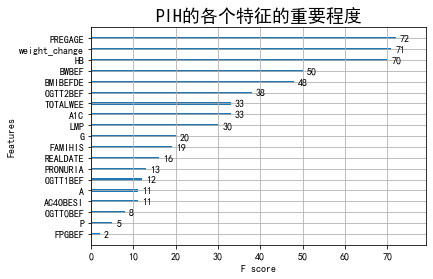

No handles with labels found to put in legend.


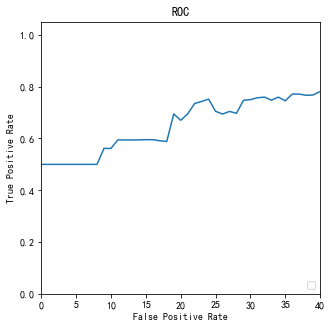

[13:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.53403
[1]	validation_0-auc:0.53403
[2]	validation_0-auc:0.54873
[3]	validation_0-auc:0.54888
[4]	validation_0-auc:0.59478
[5]	validation_0-auc:0.59384
[6]	validation_0-auc:0.61618
[7]	validation_0-auc:0.61526
[8]	validation_0-auc:0.59966
[9]	validation_0-auc:0.59306
[10]	validation_0-auc:0.59209
[11]	validation_0-auc:0.62110
[12]	validation_0-auc:0.60804
[13]	validation_0-auc:0.62358
[14]	validation_0-auc:0.59897
[15]	validation_0-auc:0.61461
[16]	validation_0-auc:0.62901
[17]	validation_0-auc:0.61860
[18]	validation_0-auc:0.63028
[19]	validation_0-auc:0.62694
[20]	validation_0-auc:0.

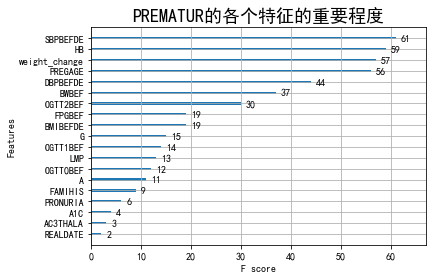

No handles with labels found to put in legend.


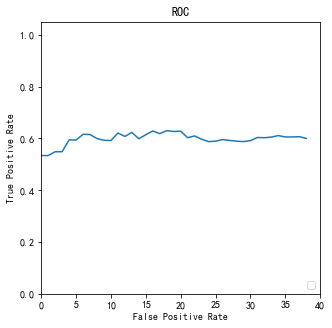

[13:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.50000
[1]	validation_0-auc:0.50000
[2]	validation_0-auc:0.50000
[3]	validation_0-auc:0.55650
[4]	validation_0-auc:0.56443
[5]	validation_0-auc:0.58534
[6]	validation_0-auc:0.58741
[7]	validation_0-auc:0.55636
[8]	validation_0-auc:0.59669
[9]	validation_0-auc:0.58909
[10]	validation_0-auc:0.58926
[11]	validation_0-auc:0.60562
[12]	validation_0-auc:0.60775
[13]	validation_0-auc:0.59997
[14]	validation_0-auc:0.60600
[15]	validation_0-auc:0.61760
[16]	validation_0-auc:0.61381
[17]	validation_0-auc:0.61018
[18]	validation_0-auc:0.60023
[19]	validation_0-auc:0.60092
[20]	validation_0-auc:0.

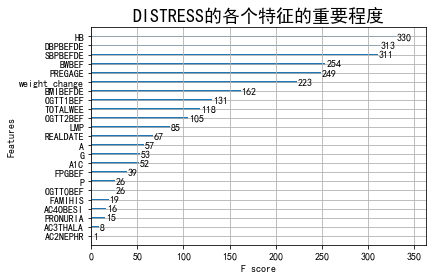

No handles with labels found to put in legend.


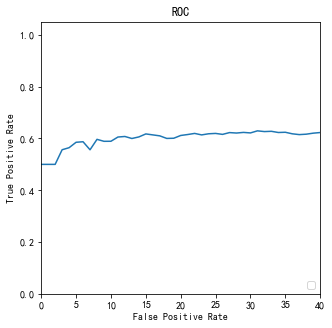

[13:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.50000
[1]	validation_0-auc:0.50000
[2]	validation_0-auc:0.50000
[3]	validation_0-auc:0.50000
[4]	validation_0-auc:0.49667
[5]	validation_0-auc:0.48250
[6]	validation_0-auc:0.69317
[7]	validation_0-auc:0.68996
[8]	validation_0-auc:0.68442
[9]	validation_0-auc:0.68075
[10]	validation_0-auc:0.68050
[11]	validation_0-auc:0.70837
[12]	validation_0-auc:0.66742
[13]	validation_0-auc:0.67788
[14]	validation_0-auc:0.68554
[15]	validation_0-auc:0.68512
[16]	validation_0-auc:0.68367
[17]	validation_0-auc:0.70088
[18]	validation_0-auc:0.69692
[19]	validation_0-auc:0.69996
[20]	validation_0-auc:0.

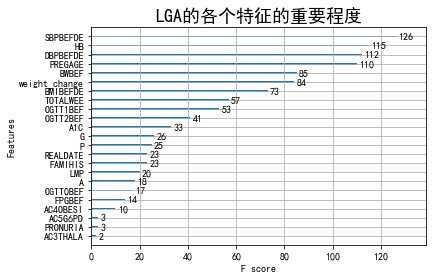

No handles with labels found to put in legend.


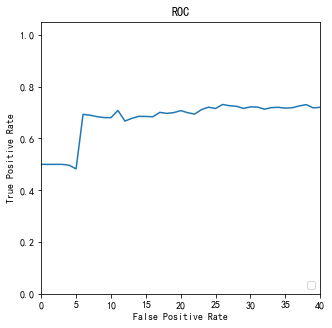

[13:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.50000
[1]	validation_0-auc:0.54918
[2]	validation_0-auc:0.54918
[3]	validation_0-auc:0.54918
[4]	validation_0-auc:0.54918
[5]	validation_0-auc:0.54918
[6]	validation_0-auc:0.54918
[7]	validation_0-auc:0.54918
[8]	validation_0-auc:0.54918
[9]	validation_0-auc:0.54918
[10]	validation_0-auc:0.54770
[11]	validation_0-auc:0.54770
[12]	validation_0-auc:0.54770
[13]	validation_0-auc:0.54770
[14]	validation_0-auc:0.54770
[15]	validation_0-auc:0.54770
[16]	validation_0-auc:0.54770
[17]	validation_0-auc:0.54779
[18]	validation_0-auc:0.58426
[19]	validation_0-auc:0.58426
[20]	validation_0-auc:0.

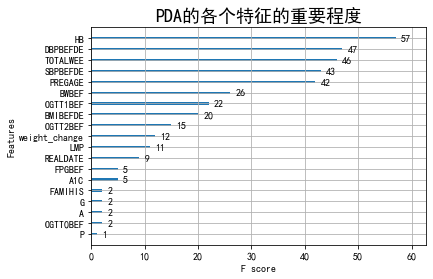

No handles with labels found to put in legend.


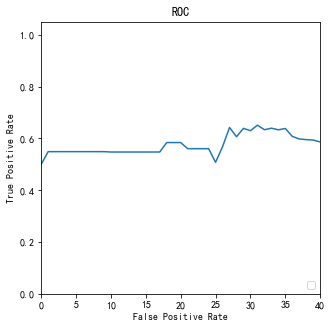

In [33]:
#集成学习
#Xgboost
import xgboost as  xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.3,random_state=42)

X_train,y_train,X_test,y_test = data_separate(data_attribute_N1,y)
clf = xgb.XGBClassifier(max_depth=5,         #树的最大深度
                        learning_rate=0.1, 
                        n_estimators=200,     #决策树的棵树，即总共迭代的次数
                        silent=True, 
                        objective='binary:logistic', 
                        nthread=1,   #最大线程数
                        gamma=0,      #gamma 给定了所需的最低loss function的值
                        min_child_weight=1,    #孩子节点中最小的样本权重和，在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数
                        max_delta_step=0,   #使得xgboost更新过程更加保守，但在使用logistics 回归时，若类别极度不平衡，则调整该参数可能有效果
                        subsample=0.85,     #用于训练模型的子样本占整个样本集合的比例
                        colsample_bytree=0.6,    #在建立树时对特征随机采样的比例
                        colsample_bylevel=1,     #决定每次节点划分时子样例的比例
                        reg_alpha=0,            #L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快
                        reg_lambda=1,            #L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
                        scale_pos_weight=3,      #大于0的取值可以处理类别不平衡的情况。例如，当正负样本比例为1:10时，scale_pos_weight=10
                        seed=1440,             #校验数据所需要的评价指标
                        missing=None)
clf_xg = clf

y_test_0_1 = y_2change_0(y)
for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2, y)
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute3, y)
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute, y)
        clf.fit(X_train, y_train[i],early_stopping_rounds=20,   #如果模型的loss20次内没有减小，则提前结束模型训练
                eval_set=[(test_X, y_test[i])],  #例如，当正负样本比例为1:10时，scale_pos_weight=10
                eval_metric='auc',       #校验数据所需要的评价指标
                verbose=True
                )

        
        evals_result = clf.evals_result()    #字典，存储在watchlist中的元素的评估结果
        print('{}的AUC为{}'.format(i,evals_result))  
        #print('metrics得到的auc为{}'.format(roc_auc_score(y_test[i],pred)))
        print(clf.feature_importances_)    #特征重要性
        plot_importance(clf,max_num_features=24)
        plt.title("{}的各个特征的重要程度".format(i),fontsize = 18)
        plt.rcParams['font.sans-serif']=['SimHei']
        plt.show()
        
        #画ROC变化趋势曲线
        #pred = clf.predict(test_X)
        #y_test_hot = label_binarize(y_test[i],classes =(0, 1))
        #fpr,tpr,thresholds = metrics.roc_curve(y_test[i],pred)
        plt.figure(figsize = (5,5))
        #Xgbc_auc = roc_auc_score(y_test[i],pred)
        plt.plot([i for i in range(len(list(evals_result['validation_0']['auc'])))],list(evals_result['validation_0']['auc']))
        #plt.plot([0,1],[0,1],color = 'navy',lw = 2,linestyle = '--')
        plt.xlim([0,40])
        plt.ylim([0,1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc = 'lower right')
        plt.show()

In [ ]:
#print(evals_result)
#print(type(evals_result['validation_0']['auc']))
#x_y_auc = list(enumerate(evals_result['validation_0']['auc'],start = 1))
#print(x_y_auc)
#print(list(evals_result['validation_0']['auc']))



In [ ]:
'''
#网格暴力搜索
from sklearn.model_selection import GridSearchCV
import numpy as np
import xgboost as xgb

X_train,y_train,X_test,y_test = data_separate(data_attribute_N1,y)

clf1 = xgb.XGBClassifier(max_depth=5,min_child_weight=1
                    )
#设定网格搜索的xgboost参数搜索范围，值搜索XGBoost的主要6个参数
param_dist = {
        'learning_rate':np.linspace(0.1,1,5),
        'subsample':np.linspace(0.7,0.9,5),
        'colsample_bytree':np.linspace(0.5,0.98,5),
        'n_estimators':np.linspace(100,500,5)
        }

#GridSearchCV参数说明，clf1设置训练的学习器
#param_dist字典类型，放入参数搜索范围
#scoring = 'roc_auc'，精度评价方式设定为“roc_auc“
#n_iter=300，训练300次，数值越大，获得的参数精度越大，但是搜索时间越长
#n_jobs = -1，使用所有的CPU进行训练，默认为1，使用1个CPU
grid = GridSearchCV(clf1,param_dist,cv = 3,scoring = 'roc_auc',n_jobs = 1)
  
#在训练集上训练
for i in y.columns:
    if i in calRoc:
        grid.fit(X_train,np.ravel(y_train[i]))
        #返回最优的训练器
        best_estimator = grid.best_estimator_
        print(best_estimator)
        #输出最优训练器的精度
'''



#### XGBClassifier(colsample_bytree=0.86, learning_rate=2.0, max_depth=2,min_child_weight=4, n_estimators=78, subsample=0.7)
#### XGBClassifier(colsample_bytree=0.86, learning_rate=2.0, max_depth=2,min_child_weight=4, n_estimators=50, subsample=0.8)
#### XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, min_child_weight=4,n_estimators=58, subsample=0.7)
#### XGBClassifier(colsample_bytree=0.74, learning_rate=2.0, max_depth=4,min_child_weight=2, n_estimators=54, subsample=0.75)
#### XGBClassifier(colsample_bytree=0.74, learning_rate=0.5075, min_child_weight=3,n_estimators=50, subsample=0.9

In [ ]:
'''
#随机森林+SMOTE
from sklearn import linear_model,ensemble
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
import matplotlib.pyplot as plt
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.4,random_state=42)

#随机森林
forest = ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

clf_forest = forest
#X_train,y_train,X_test,y_test = data_separate(data_attribute_N1,y)

for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute_N2, y)
            y_test = y_test[i]
            X_train, y_train = sm.fit_resample(X_train,y_train[i])
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute_N3, y)
            y_test = y_test[i]
            X_train, y_train = sm.fit_resample(X_train,y_train[i])
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute_N1, y)
            y_test = y_test[i]
            X_train, y_train = sm.fit_resample(X_train,y_train[i])
        forest.fit(X_train, y_train)
        forest_y_score=forest.predict_proba(test_X)
        y_test_hot = label_binarize(y_test,classes =(0, 1))
        forest_fpr,forest_tpr,forest_threasholds=metrics.roc_curve(y_test_hot.ravel(),forest_y_score[:,1].ravel()) # 计算ROC的值
        forest_auc=metrics.auc(forest_fpr,forest_tpr) #Gbdt_auc值
        print("对于{}属性的AUC：{}".format(i,forest_auc))
        
        #利用属性重要性画图
        importances = forest.feature_importances_
        print("对于{}属性的重要性：".format(i))
        x_columns = X_train.columns
        indices = np.argsort(importances)[::-1]    #np.argsort从小到大排序提取索引,[::-1]从后向前取
        
        new_columns = []
        for f in range(X_train.shape[1]):
            #%-*s 代表输入一个字符串，-号代表左对齐、后补空白，*号代表对齐宽度由输入时确定,30是空白数
            print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], importances[indices[f]]))   
            new_columns.append(x_columns[indices[f]])

        plt.figure(figsize=(10,6))
        plt.title("{}的各个特征的重要程度".format(i),fontsize = 18)
        plt.ylabel("import level",fontsize = 15,rotation=90)
        plt.rcParams['font.sans-serif'] = ["SimHei"]     ##设置字体为SimHei显示中文
        plt.rcParams['axes.unicode_minus'] = False       #设置正常显示字符
        for i in range(x_columns.shape[0]):
            plt.bar(i,importances[indices[i]],color='orange',align='center')  #i代表条形位置,importance代表高度
            plt.xticks(np.arange(x_columns.shape[0]),new_columns,rotation=90,fontsize=15)
        plt.show()
'''   
        

对于PIH属性的AUC：0.7516501650165017
对于PIH属性的重要性：
 1) HB                             0.111821
 2) PREGAGE                        0.111581
 3) weight_change                  0.106248
 4) BWBEF                          0.097796
 5) BMIBEFDE                       0.072370
 6) OGTT2BEF                       0.066004
 7) OGTT1BEF                       0.062031
 8) TOTALWEE                       0.061160
 9) REALDATE                       0.048984
10) A1C                            0.048734
11) LMP                            0.035723
12) FAMIHIS                        0.031614
13) G                              0.031182
14) FPGBEF                         0.028530
15) OGTT0BEF                       0.023492
16) A                              0.021490
17) PRONURIA                       0.017406
18) P                              0.012985
19) AC4OBESI                       0.009038
20) AC3THALA                       0.001710
21) AC2NEPHR                       0.000073
22) AC5G6PD                     

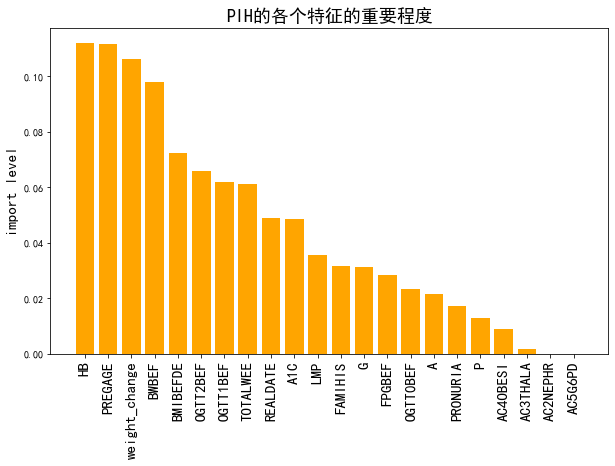

对于PREMATUR属性的AUC：0.589396551724138
对于PREMATUR属性的重要性：
 1) SBPBEFDE                       0.119406
 2) HB                             0.098798
 3) weight_change                  0.089147
 4) BWBEF                          0.087612
 5) DBPBEFDE                       0.086715
 6) PREGAGE                        0.083674
 7) BMIBEFDE                       0.067092
 8) OGTT2BEF                       0.058040
 9) OGTT1BEF                       0.054093
10) FPGBEF                         0.037912
11) REALDATE                       0.032188
12) LMP                            0.032098
13) G                              0.029341
14) OGTT0BEF                       0.026260
15) A1C                            0.021032
16) A                              0.020817
17) FAMIHIS                        0.019297
18) P                              0.014428
19) PRONURIA                       0.012376
20) AC3THALA                       0.005807
21) AC4OBESI                       0.003483
22) AC5G6PD            

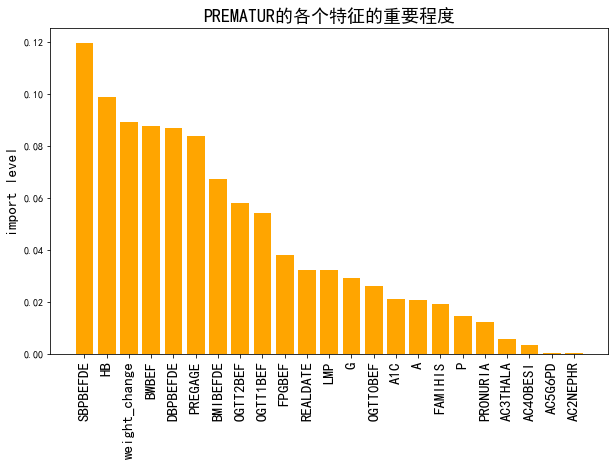

对于DISTRESS属性的AUC：0.6127842928216062
对于DISTRESS属性的重要性：
 1) HB                             0.105737
 2) SBPBEFDE                       0.105573
 3) DBPBEFDE                       0.094921
 4) BWBEF                          0.084409
 5) PREGAGE                        0.080695
 6) weight_change                  0.076043
 7) BMIBEFDE                       0.066509
 8) OGTT1BEF                       0.058208
 9) OGTT2BEF                       0.051311
10) TOTALWEE                       0.050750
11) REALDATE                       0.038250
12) A1C                            0.029764
13) LMP                            0.029643
14) FPGBEF                         0.023794
15) G                              0.022906
16) OGTT0BEF                       0.019821
17) FAMIHIS                        0.016667
18) A                              0.016314
19) P                              0.008113
20) AC3THALA                       0.006810
21) PRONURIA                       0.005186
22) AC4OBESI          

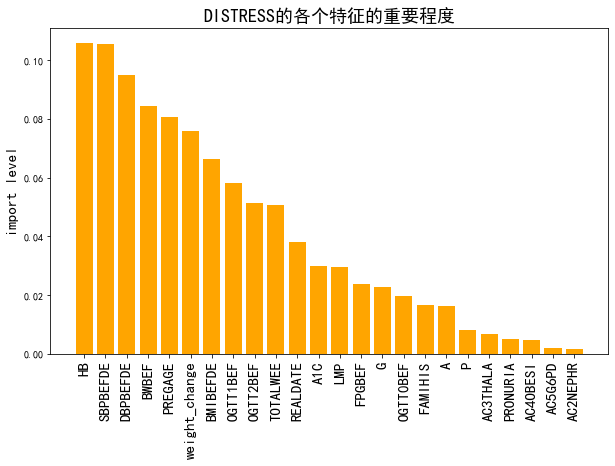

对于LGA属性的AUC：0.6887083333333334
对于LGA属性的重要性：
 1) SBPBEFDE                       0.098833
 2) PREGAGE                        0.089096
 3) DBPBEFDE                       0.087541
 4) HB                             0.086755
 5) BWBEF                          0.084446
 6) weight_change                  0.075815
 7) BMIBEFDE                       0.064572
 8) OGTT1BEF                       0.055043
 9) OGTT2BEF                       0.054238
10) TOTALWEE                       0.053996
11) REALDATE                       0.032664
12) A1C                            0.027338
13) G                              0.027308
14) FAMIHIS                        0.026650
15) LMP                            0.025908
16) FPGBEF                         0.023432
17) OGTT0BEF                       0.021544
18) A                              0.020348
19) P                              0.020217
20) AC4OBESI                       0.009558
21) AC3THALA                       0.005990
22) PRONURIA                    

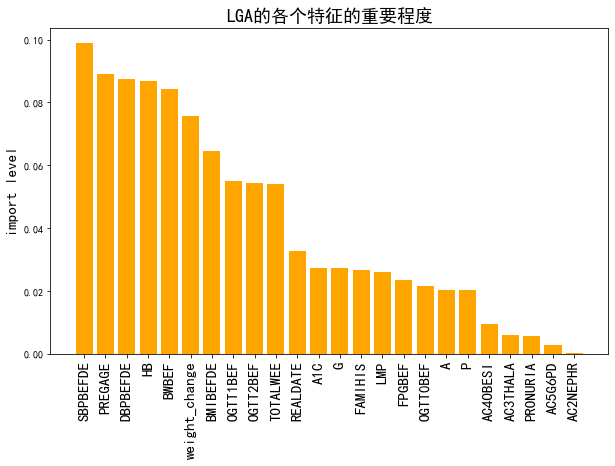

对于PDA属性的AUC：0.6923770491803278
对于PDA属性的重要性：
 1) TOTALWEE                       0.148216
 2) SBPBEFDE                       0.101257
 3) HB                             0.095615
 4) PREGAGE                        0.089503
 5) DBPBEFDE                       0.084389
 6) weight_change                  0.066770
 7) BMIBEFDE                       0.064125
 8) BWBEF                          0.058858
 9) OGTT1BEF                       0.058176
10) OGTT2BEF                       0.040802
11) REALDATE                       0.028197
12) LMP                            0.026470
13) A                              0.023137
14) FPGBEF                         0.022631
15) G                              0.021707
16) A1C                            0.020307
17) FAMIHIS                        0.015355
18) OGTT0BEF                       0.012781
19) P                              0.010006
20) AC3THALA                       0.006441
21) AC4OBESI                       0.004433
22) PRONURIA                    

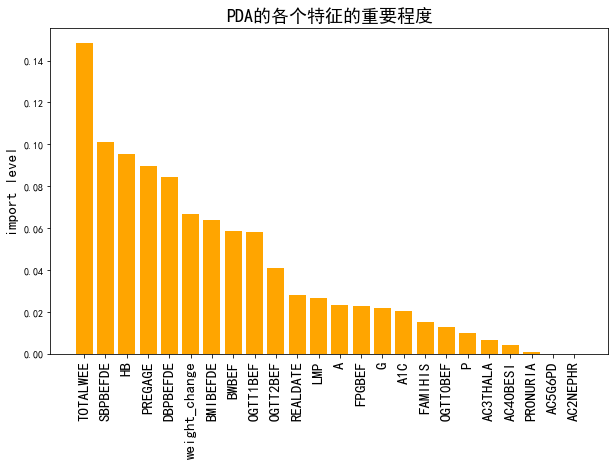

In [34]:
#无SMOOTE的随机森林
#随机森林
from sklearn import linear_model,ensemble
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
import matplotlib.pyplot as plt

#随机森林
forest = ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#X_train,y_train,X_test,y_test = data_separate(data_attribute_N1,y)

for i in y.columns:
    if i in calRoc:
        #训练模型计算AUC
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2,y)
        elif i == 'PREMATUR':
            X_train,y_train,test_X,y_test = data_separate(data_attribute3,y)
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute,y)
        forest.fit(X_train, y_train[i])
        forest_y_score=forest.predict_proba(test_X)
        y_test_hot = label_binarize(y_test[i],classes =(0, 1))
        forest_fpr,forest_tpr,forest_threasholds=metrics.roc_curve(y_test_hot.ravel(),forest_y_score[:,1].ravel()) # 计算ROC的值
        forest_auc=metrics.auc(forest_fpr,forest_tpr) #Gbdt_auc值
        print("对于{}属性的AUC：{}".format(i,forest_auc))
        
        #利用属性重要性画图
        importances = forest.feature_importances_
        print("对于{}属性的重要性：".format(i))
        x_columns = X_train.columns
        indices = np.argsort(importances)[::-1]    #np.argsort从小到大排序提取索引,[::-1]从后向前取
        
        new_columns = []
        for f in range(X_train.shape[1]):
            #%-*s 代表输入一个字符串，-号代表左对齐、后补空白，*号代表对齐宽度由输入时确定,30是空白数
            print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], importances[indices[f]]))   
            new_columns.append(x_columns[indices[f]])

        plt.figure(figsize=(10,6))
        plt.title("{}的各个特征的重要程度".format(i),fontsize = 18)
        plt.ylabel("import level",fontsize = 15,rotation=90)
        plt.rcParams['font.sans-serif'] = ["SimHei"]     ##设置字体为SimHei显示中文
        plt.rcParams['axes.unicode_minus'] = False       #设置正常显示字符
        for i in range(x_columns.shape[0]):
            plt.bar(i,importances[indices[i]],color='orange',align='center')  #i代表条形位置,importance代表高度
            plt.xticks(np.arange(x_columns.shape[0]),new_columns,rotation=90,fontsize=15)
        plt.show()

## Borederline SMOTE:https://blog.csdn.net/u010834867/article/details/106065455/

In [ ]:
'''
#SMOTE的stackiing融合+f 特征选择+SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
#smo = SMOTE(sampling_strategy= 1,random_state=42)
#sm = BorderlineSMOTE(sampling_strategy= 0.5,random_state=42,kind = 'borderline-1')
for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH':
            X_train,y_train,test_X,y_test = data_separate(data_attribute_PIH_new, y)
            y_test = y_test[i]
            X_train, y_train = sm.fit_resample(X_train,y_train[i])
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute_PREMATUR_new, y)
            y_test = y_test[i]
            X_train, y_train = sm.fit_resample(X_train,y_train[i])
        elif i == 'DISTRESS':
            X_train,y_train,test_X,y_test = data_separate(data_attribute_DISTRESS, y)
            y_test = y_test[i]
            X_train, y_train = sm.fit_resample(X_train,y_train[i])
        elif i == 'LGA':
            X_train,y_train,test_X,y_test = data_separate(data_attribute_LGA, y)
            y_test = y_test[i]
            X_train, y_train = sm.fit_resample(X_train,y_train[i])
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute_PDA, y)
            y_test = y_test[i]
            X_train, y_train = sm.fit_resample(X_train,y_train[i])

        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        X_test = np.array(test_X)
        y_test = np.array(y_test)

#定义第一层模型   
### 第一层模型
        clfs = [ svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced',probability=True,gamma='auto'),
               xgb.XGBClassifier(max_depth=5,         #树的最大深度
                        learning_rate=0.1, 
                        n_estimators=200,     #决策树的棵树，即总共迭代的次数
                        silent=True, 
                        objective='binary:logistic', 
                        nthread=1,   #最大线程数
                        gamma=0,      #gamma 给定了所需的最低loss function的值
                        min_child_weight=1,    #孩子节点中最小的样本权重和，在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数
                        max_delta_step=0,   #使得xgboost更新过程更加保守，但在使用logistics 回归时，若类别极度不平衡，则调整该参数可能有效果
                        subsample=0.85,     #用于训练模型的子样本占整个样本集合的比例
                        colsample_bytree=0.6,    #在建立树时对特征随机采样的比例
                        colsample_bylevel=1,     #决定每次节点划分时子样例的比例
                        reg_alpha=0,            #L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快
                        reg_lambda=1,            #L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
                        scale_pos_weight=3,      #大于0的取值可以处理类别不平衡的情况。例如，当正负样本比例为1:10时，scale_pos_weight=10
                        seed=1440,             #校验数据所需要的评价指标
                        ),
               ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1),

        ]
        X_train_stack  = np.zeros((X_train.shape[0], len(clfs)))   #(1548,3)
        X_test_stack = np.zeros((X_test.shape[0], len(clfs)))      #(517,3)

#数据输入第一层模型，输出即将喂给第二层模型特征
### 3折stacking
        n_folds = 3
        skf = StratifiedKFold(n_splits=n_folds, random_state=1,shuffle=True)
        for index,clf in enumerate(clfs):
        #     print("分类器：{}".format(clf))
            X_stack_test_n = np.zeros((X_test.shape[0], n_folds))    #(517,3)
            
#             X_train = X_train.values
#             X_test = X_test.values
#             y_train = y_train.values
#             y_test = y_test.values
            for j,(train_index,test_index) in enumerate(skf.split(X_train,y_train)): #skf.split返回训练集、验证集的索引,几折就几次
                tr_x = X_train[train_index]  #1032
                tr_y = y_train[train_index]  #1032
                clf.fit(tr_x,tr_y)
                #生成stacking训练数据集
                X_train_stack [test_index, index] = clf.predict_proba(X_train[test_index])[:,1]  #test_index:516   index:0,1,2
                X_stack_test_n[:,j] = clf.predict_proba(X_test)[:,1]
                #生成stacking测试数据集
            X_test_stack[:,index] = X_stack_test_n.mean(axis=1)
        ###第二层模型LR
        clf_second = LogisticRegression(penalty='l2',solver="lbfgs",C=0.1,class_weight='balanced')
        clf_second.fit(X_train_stack,y_train)
        pred = clf_second.predict_proba(X_test_stack)[:,1]
       # print('{}的预测值为:{}'.format(i,pred))
        print('AUC为{}'.format(roc_auc_score(y_test,pred)))#0.9946
'''

In [ ]:
#网格暴力搜索
'''
from sklearn.model_selection import GridSearchCV

clf2 = ensemble.RandomForestClassifier(random_state=0)
param_dist = {
    'n_estimators':range(100,300,50),
    'min_samples_split':range(1,5,1),
    'min_samples_leaf':range(1,5,1)
    
}
grid = GridSearchCV(clf2,param_dist,scoring = 'roc_auc',n_jobs = 2)
#在训练集上训练
for i in y.columns:
    if i in calRoc:
        grid.fit(X_train,np.ravel(y_train[i]))
        #返回最优的训练器
        best_estimator = grid.best_estimator_
        print(best_estimator)
        #输出最优训练器的精度
 
#网格暴力搜索

from sklearn.model_selection import GridSearchCV

clf2 =  [ svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced',probability=True,gamma='auto'),
               xgb.XGBClassifier(max_depth=5,         #树的最大深度
                        learning_rate=0.1, 
                        n_estimators=200,     #决策树的棵树，即总共迭代的次数
                        silent=True, 
                        objective='binary:logistic', 
                        nthread=1,   #最大线程数
                        gamma=0,      #gamma 给定了所需的最低loss function的值
                        min_child_weight=1,    #孩子节点中最小的样本权重和，在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数
                        max_delta_step=0,   #使得xgboost更新过程更加保守，但在使用logistics 回归时，若类别极度不平衡，则调整该参数可能有效果
                        subsample=0.85,     #用于训练模型的子样本占整个样本集合的比例
                        colsample_bytree=0.6,    #在建立树时对特征随机采样的比例
                        colsample_bylevel=1,     #决定每次节点划分时子样例的比例
                        reg_alpha=0,            #L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快
                        reg_lambda=1,            #L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
                        scale_pos_weight=3,      #大于0的取值可以处理类别不平衡的情况。例如，当正负样本比例为1:10时，scale_pos_weight=10
                        seed=1440,             #校验数据所需要的评价指标
                        ),
               ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1),
param_dist = {
    'n_estimators':range(100,300,50),
    'min_samples_split':range(1,5,1),
    'min_samples_leaf':range(1,5,1)
    
}
grid = GridSearchCV(clf2,param_dist,scoring = 'roc_auc',n_jobs = 2)
#在训练集上训练
for i in y.columns:
    if i in calRoc:
        grid.fit(X_train,np.ravel(y_train[i]))
        #返回最优的训练器
        best_estimator = grid.best_estimator_
        print(best_estimator)
        #输出最优训练器的精度
 '''

In [ ]:
#无SMOTE的stacking+F特征选择
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
#smo = SMOTE(sampling_strategy=0.3,random_state=42)

for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH':
            X_train,y_train,test_X,y_test = data_separate(data_attribute_PIH_new, y)
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute_PREMATUR_new, y)
        elif i == 'DISTRESS':
            X_train,y_train,test_X,y_test = data_separate(data_attribute_DISTRESS, y)
        elif i == 'LGA':
            X_train,y_train,test_X,y_test = data_separate(data_attribute_LGA, y)
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute_PDA, y)
        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        X_train = np.array(X_train)
        y_train = np.array(y_train[i])
        X_test = np.array(test_X)
        y_test = np.array(y_test[i])
#定义第一层模型   
### 第一层模型
        clfs = [ svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced',probability=True,gamma='auto',random_state=0),
               xgb.XGBClassifier(max_depth=5,         #树的最大深度
                        learning_rate=0.1, 
                        n_estimators=250,     #决策树的棵树，即总共迭代的次数
                        silent=True, 
                        objective='binary:logistic', 
                        nthread=1,   #最大线程数
                        gamma=0,      #gamma 给定了所需的最低loss function的值
                        min_child_weight=1,    #孩子节点中最小的样本权重和，在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数
                        max_delta_step=10,   #使得xgboost更新过程更加保守，但在使用logistics 回归时，若类别极度不平衡，则调整该参数可能有效果
                        subsample=0.85,     #用于训练模型的子样本占整个样本集合的比例
                        colsample_bytree=0.6,    #在建立树时对特征随机采样的比例
                        colsample_bylevel=1,     #决定每次节点划分时子样例的比例
                        reg_alpha=0,            #L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快
                        reg_lambda=1,            #L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
                        scale_pos_weight=3,      #大于0的取值可以处理类别不平衡的情况。例如，当正负样本比例为1:10时，scale_pos_weight=10
                        seed=1440,             #校验数据所需要的评价指标
                        random_state=0),
               ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1),

        ]
        X_train_stack  = np.zeros((X_train.shape[0], len(clfs)))   #(1548,3)
        X_test_stack = np.zeros((X_test.shape[0], len(clfs)))      #(517,3)

#数据输入第一层模型，输出即将喂给第二层模型特征
### 3折stacking
        n_folds = 3
        skf = StratifiedKFold(n_splits=n_folds, random_state=1,shuffle=True)
        for index,clf in enumerate(clfs):
        #     print("分类器：{}".format(clf))
            X_stack_test_n = np.zeros((X_test.shape[0], n_folds))    #(517,3)
            
#             X_train = X_train.values
#             X_test = X_test.values
#             y_train = y_train.values
#             y_test = y_test.values
            for j,(train_index,test_index) in enumerate(skf.split(X_train,y_train)): #skf.split返回训练集、验证集的索引,几折就几次
                tr_x = X_train[train_index]  #1032
                tr_y = y_train[train_index]  #1032
                clf.fit(tr_x,tr_y)
                #生成stacking训练数据集
                X_train_stack [test_index, index] = clf.predict_proba(X_train[test_index])[:,1]  #test_index:516   index:0,1,2
                X_stack_test_n[:,j] = clf.predict_proba(X_test)[:,1]
                #生成stacking测试数据集
            X_test_stack[:,index] = X_stack_test_n.mean(axis=1)
        ###第二层模型LR
        clf_second = LogisticRegression(penalty='l2',solver="lbfgs",class_weight = 'balanced')
        clf_second.fit(X_train_stack,y_train)
        pred = clf_second.predict_proba(X_test_stack)[:,1]
        print('AUC为{}'.format(roc_auc_score(y_test,pred)))

----------------------------------------------------------------------------------------------


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beha

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:39:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:39:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:40:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:42:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

<ipython-input-104-a1c5f89cae9b>:126: MatplotlibDeprecationWarning: Unrecognized location 'low right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'low right')


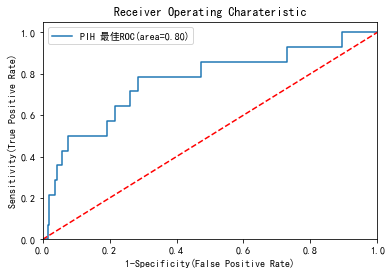

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:01:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but 

<ipython-input-104-a1c5f89cae9b>:126: MatplotlibDeprecationWarning: Unrecognized location 'low right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'low right')


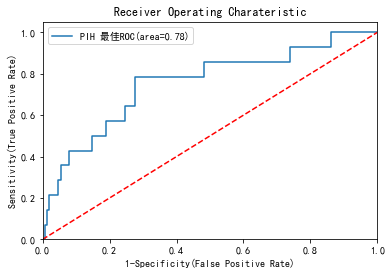

第1次迭代的AUC为:[0.7620226308345119, 0.751885902876002, 0.7574257425742573, 0.7542432814710043, 0.7542432814710043, 0.7782885431400283, 0.7542432814710043, 0.751885902876002, 0.7385077793493634, 0.7542432814710043, 0.751885902876002, 0.7385077793493634, 0.7782885431400283, 0.7574257425742573, 0.7620226308345119, 0.748939179632249, 0.7574257425742573, 0.7782885431400283, 0.7542432814710043, 0.751885902876002, 0.7542432814710043, 0.751885902876002, 0.7620226308345119, 0.7574257425742573, 0.7782885431400283, 0.7782885431400283, 0.7620226308345119, 0.751885902876002, 0.7782885431400283, 0.751885902876002, 0.7782885431400283, 0.748939179632249, 0.751885902876002, 0.7782885431400283, 0.7782885431400283, 0.7782885431400283, 0.7620226308345119, 0.6010726072607261, 0.7782885431400283, 0.751885902876002, 0.7574257425742573, 0.748939179632249, 0.7542432814710043, 0.7782885431400283, 0.7620226308345119, 0.7574257425742573, 0.7782885431400283, 0.7542432814710043, 0.7782885431400283, 0.7385077793493634, 

In [ ]:
#无SMOTE的stacking+F特征选择+遗传算法
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier as BC
from sklearn import neighbors, naive_bayes,ensemble,discriminant_analysis,gaussian_process
import numpy as np
import copy
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
#smo = SMOTE(sampling_strategy=0.3,random_state=42)

with open('D:\jupyter\stacking\zhongqun.txt','a') as f:
    f.seek(0)
    f.truncate() #清空文件
with open('D:\jupyter\stacking\pop_choice.txt','a') as f:
    f.seek(0)
    f.truncate() #清空文件
#########遗传初始化编码###############
def incoding(POP_SIZE,DNA_SIZE):
    #print(DNA_SIZE)   #24
    #np.random.seed(1)
    pop = pd.DataFrame(np.random.randint(2,size = (POP_SIZE,DNA_SIZE)))
    #print(pop.shape)  #(10，24)
    #print(type(pop))

    #print(pop)

    #将随机初始化的特征组合中为0的列数取出来
    list_location = []
    location = 0
    for i in range(len(pop)):
        tmp = []
        for j in range(10):
            if pop[j][i] == 0:
                tmp.append(location)
            location+=1
        location = 0
        list_location.append(tmp)
    #print(list_location)
    return(pop,list_location)
################选择#################
def select(fitness):
    idx = np.random.choice(np.arange(200),size = 100,replace = False,
                          p = (fitness)/(np.array(fitness).sum()))
    return idx
#####################交叉、变异#############################
def mutation(child,MUTATION_RATE):
    np.random.seed(None)
    if np.random.rand() < MUTATION_RATE:        #以MUTATION_RATE的概率进行变异
        mutate_point = np.random.randint(0,DNA_SIZE,size=5)    #随机产生一个实数，代表要变异基因的位置
        child[mutate_point] = child[mutate_point]^1     #将变异点的二进制反转
    return child

def crossover_and_mutation(pop_choice,CROSSOVER_RATE):
    np.random.seed(None)
    new_pop = []
    for i in range(len(pop_choice)): #遍历种群中每个个体，将该个体作为父亲
        father = pop_choice.iloc[i]
        child = father.copy(deep = True)         #孩子先得父亲的全部基因（这里一串二进制的那些1，0成为基因）
        if np.random.rand() < CROSSOVER_RATE:    #产生子代不是必然发生交叉，而是以一定概率发生交叉
            mother = pop_choice.iloc[np.random.randint(POP_SIZE)]   #在种群中选择另一个个体，并将该个体作为母亲
            cross_points = np.random.randint(low = 0,high = DNA_SIZE)   #随机产生交叉的点
            child[cross_points:] = mother[cross_points:]         #孩子得到位于交叉点后的母亲的基因
        child = mutation(child,MUTATION_RATE = 0.8)     #每个后代有一定的几率发生变异
        new_pop.append(child)
    return new_pop

#数据输入第一层模型，输出即将喂给第二层模型特征
def Second_model(X_train,y_train,test_X,test_y,inital_model,folds):
    X_train_stack  = np.zeros((X_train.shape[0], len(clfs)))   #(1548,3)
    X_test_stack = np.zeros((X_test.shape[0], len(clfs)))      #(517,3)
    n_folds = folds
    skf = StratifiedKFold(n_splits=n_folds, random_state=1,shuffle=True)
    for index,clf in enumerate(inital_model):
    #     print("分类器：{}".format(clf))
        X_stack_test_n = np.zeros((X_test.shape[0], n_folds))    #(517,3)
        for j,(train_index,test_index) in enumerate(skf.split(X_train,y_train)): #skf.split返回训练集、验证集的索引,几折就几次
            tr_x = X_train[train_index]  #1032
            tr_y = y_train[train_index]  #1032
            clf.fit(tr_x,tr_y)
            #生成stacking训练数据集
            X_train_stack [test_index, index] = clf.predict_proba(X_train[test_index])[:,1]  #test_index:516   index:0,1,2
            X_stack_test_n[:,j] = clf.predict_proba(X_test)[:,1]
            #生成stacking测试数据集
        X_test_stack[:,index] = X_stack_test_n.mean(axis=1)
    ###第二层模型LR
    clf_second = LogisticRegression(penalty='l2',solver="lbfgs",class_weight = 'balanced')
    clf_second.fit(X_train_stack,y_train)
    pred = clf_second.predict_proba(X_test_stack)[:,1]
    y_test_hot = label_binarize(y_test,classes =(0, 1))
    fpr,tpr,thresholds = metrics.roc_curve(y_test_hot,pred)
    AUC = roc_auc_score(y_test,pred)
    return AUC,fpr,tpr

def print_info(pop,fitness,clfs,X_train,y_train,X_test,y_test,folds):
    max_fitness_index = np.argmax(fitness)
    print('Max_fitness:{}'.format(fitness[max_fitness_index]))
    print('最优基因型为:{}'.format(list(pop.iloc[max_fitness_index])))
    
    initial_model_tu = copy.deepcopy(clfs)
    for i in list(pop.iloc[max_fitness_index]):
        if i == 0:
            initial_model_tu[i] = 0
    index = []
    ###########去掉为0的模型###############
    for i,each in enumerate(initial_model_tu):
        if each == 0:
            index.append(i)
    initial_model_tu = np.delete(initial_model_tu,index).tolist()
    auc,fpr,tpr = Second_model(X_train,y_train,X_test,y_test,initial_model_tu,folds)
    plt.plot(tpr,fpr,label = '%s 最佳ROC(area=%0.2f)'%('PIH',fitness[max_fitness_index]))
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Charateristic')
    plt.legend(loc = 'low right')
    plt.show()


###########遗传算法初始化###############
POP_SIZE = 100
DNA_SIZE = 10
list_auc = []
b=0
c=0


pop,list_location = incoding(100,10)  #随机产生初始种群10X5
print('----------------------------------------------------------------------------------------------')
#初始化
for i in list_location:
    X_train,y_train,test_X,y_test = data_separate(data_attribute_PIH_new, y['PIH'])
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(test_X)
    y_test = np.array(y_test)
    #定义第一层模型   
    ### 第一层模型
    clfs = [ svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced',probability=True,gamma='auto'),
           xgb.XGBClassifier(max_depth=5,         #树的最大深度
                    learning_rate=0.1, 
                    n_estimators=250,     #决策树的棵树，即总共迭代的次数
                    silent=True, 
                    objective='binary:logistic', 
                    nthread=1,   #最大线程数
                    gamma=0,      #gamma 给定了所需的最低loss function的值
                    min_child_weight=1,    #孩子节点中最小的样本权重和，在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数
                    max_delta_step=10,   #使得xgboost更新过程更加保守，但在使用logistics 回归时，若类别极度不平衡，则调整该参数可能有效果
                    subsample=0.85,     #用于训练模型的子样本占整个样本集合的比例
                    colsample_bytree=0.6,    #在建立树时对特征随机采样的比例
                    colsample_bylevel=1,     #决定每次节点划分时子样例的比例
                    reg_alpha=0,            #L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快
                    reg_lambda=1,            #L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
                    scale_pos_weight=3,      #大于0的取值可以处理类别不平衡的情况。例如，当正负样本比例为1:10时，scale_pos_weight=10
                    seed=1440,             #校验数据所需要的评价指标
                    random_state=0),
           ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1),
            ADA(n_estimators=50,learning_rate = 0.03,random_state=0),
            GBDT(n_estimators=250,random_state=0),
            ET(n_estimators = 300,criterion = 'gini',max_depth = 6,random_state=0),
            gaussian_process.GaussianProcessClassifier(max_iter_predict = 50),
            naive_bayes.GaussianNB(),
            ensemble.BaggingClassifier(max_samples=0.5, n_estimators=300, random_state=0),
            neighbors.KNeighborsClassifier(n_neighbors=6,weights='uniform',algorithm='ball_tree')
            
    ]
    initial_model = copy.deepcopy(clfs)
    folds = 12
    for j in i:
        initial_model[j] = 0
        folds-=1
    index = []
    ###########去掉为0的模型###############
    for j,each in enumerate(initial_model):
        if each == 0:
            index.append(j)
        #print(index)
    initial_model = np.delete(initial_model,index).tolist()
            
    AUC,tpr,fpr = Second_model(X_train,y_train,X_test,y_test,initial_model,folds)
    list_auc.append(AUC)
fitness = copy.deepcopy(list_auc)
pop_choice = pop
print('初始化AUC为:{}'.format(fitness))
print_info(pop_choice,fitness,clfs,X_train,y_train,X_test,y_test,folds)
#选择变异遗传
for i in range(5):  #迭代次数
    list_auc = []
    new_pop = pd.DataFrame(crossover_and_mutation(pop_choice,CROSSOVER_RATE = 0.8))
    new_pop.index = range(100)
    #将为0的列数取出来
    list_location = []
    location = 0
    for j in range(len(new_pop)):
        tmp = []
        for k in range(new_pop.shape[1]):
            if new_pop[k][j] == 0:
                tmp.append(location)
                location+=1
        location = 0
        list_location.append(tmp)
    for u in list_location:    #将为0的模型置为0
        initial_model_2 = copy.deepcopy(clfs)
        folds = 12
        for li in u:
            initial_model_2[li] = 0
            folds-=1
        ###########去掉为0的模型###############
        index=[]
        for xu,each in enumerate(initial_model_2):
            if each == 0:
                index.append(xu)
            #print(index)
        initial_model_2 = np.delete(initial_model_2,index).tolist()
        AUC,tpr,fpr = Second_model(X_train,y_train,X_test,y_test,initial_model_2,folds)
        list_auc.append(AUC)
    fitness.extend(list_auc)
    choice_index = np.sort(select(fitness)) #挑选出10个索引
    fitness = copy.deepcopy(list_auc)
    sum_pop = pd.concat([pop,new_pop],axis=0)
    sum_pop.index = range(200)
    pop_choice = pd.DataFrame(sum_pop).iloc[choice_index]
    print_info(pop_choice,fitness,clfs,X_train,y_train,X_test,y_test,folds)
    pd.set_option('display.max_columns',None)
    with open('D:\jupyter\stacking\pop_choice.txt','a') as f:
        f.writelines('第%s次迭代的种群为:%s\n'%(i+1,pop_choice))
        f.writelines('----------------------\n')
    pop_choice.index = range(100)
    pop = copy.deepcopy(new_pop)
    print('第{}次迭代的AUC为:{}'.format(i+1,fitness))
    with open('D:\jupyter\stacking\zhongqun.txt','a') as f:
        f.writelines('--------------,第%s次迭代的种群为\n'%(i+1))
        f.writelines('%s\n'%l for l in fitness)
        f.writelines('-------------------\n')
    



In [96]:
print(pd.DataFrame(data_label['PIH']))

      PIH
0       1
1       1
2       1
3       1
4       1
...   ...
2060    1
2061    1
2062    1
2063    1
2064    1

[2065 rows x 1 columns]


### 画图https://www.cnpython.com/qa/64662


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-62-f811673fd2fe>:74: MatplotlibDeprecationWarning: Unrecognized location 'low right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'low right')


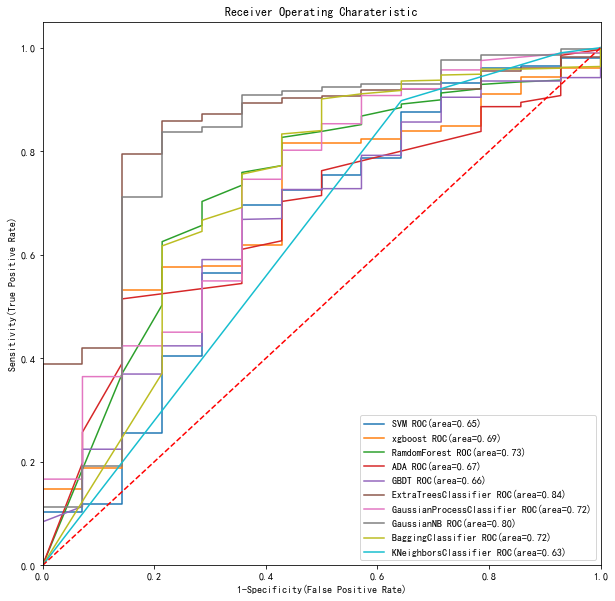

In [62]:
##########画图##############
from sklearn import metrics
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
models = [ 
    {   'label':'SVM',
        'model':svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced',probability=True,gamma='auto'),
    },
    {
        'label':'xgboost',
        'model':xgb.XGBClassifier(max_depth=5,         #树的最大深度
                learning_rate=0.1, 
                n_estimators=250,     #决策树的棵树，即总共迭代的次数
                silent=True, 
                objective='binary:logistic', 
                nthread=1,   #最大线程数
                gamma=0,      #gamma 给定了所需的最低loss function的值
                min_child_weight=1,    #孩子节点中最小的样本权重和，在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数
                max_delta_step=10,   #使得xgboost更新过程更加保守，但在使用logistics 回归时，若类别极度不平衡，则调整该参数可能有效果
                subsample=0.85,     #用于训练模型的子样本占整个样本集合的比例
                colsample_bytree=0.6,    #在建立树时对特征随机采样的比例
                colsample_bylevel=1,     #决定每次节点划分时子样例的比例
                reg_alpha=0,            #L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快
                reg_lambda=1,            #L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
                scale_pos_weight=3,      #大于0的取值可以处理类别不平衡的情况。例如，当正负样本比例为1:10时，scale_pos_weight=10
                seed=1440,             #校验数据所需要的评价指标
                random_state=0),
    },
    {
       'label':'RamdomForest',
       'model':ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1),
    },
     { 
        'label':'ADA',
        'model':ADA(n_estimators=50,learning_rate = 0.03,random_state=0),
     },
    {  
        'label':'GBDT',
        'model':GBDT(criterion='friedman_mse', learning_rate=0.03, max_depth=4, n_estimators=50, random_state=0),
    },
    {
        'label':'ExtraTreesClassifier',
        'model':ET(n_estimators = 300,criterion = 'gini',max_depth = 6,random_state=0),
    },
    {
        'label':'GaussianProcessClassifier',
        'model':gaussian_process.GaussianProcessClassifier(max_iter_predict = 50),
    },
    {
        'label':'GaussianNB',
        'model':naive_bayes.GaussianNB(),
    },
    {
        'label':'BaggingClassifier',
        'model':ensemble.BaggingClassifier(max_samples=0.5, n_estimators=300, random_state=0),
    },
    {
        'label':'KNeighborsClassifier',
        'model':neighbors.KNeighborsClassifier(n_neighbors=6,weights='uniform',algorithm='ball_tree'),
    }
    ]
for m in models:
    model = m['model']
    model.fit(X_train,y_train)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label = '%s ROC(area=%0.2f)'%(m['label'],auc))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Charateristic')
plt.legend(loc = 'low right')
plt.show()

In [61]:
#####网格搜索################
vote_est = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('etc', ensemble.ExtraTreesClassifier()),
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    ('gnb', naive_bayes.GaussianNB()),
    ('knn', neighbors.KNeighborsClassifier()),
    #('gbdt',ensemble.GradientBoostingClassifier()),
    ('bc',ensemble.BaggingClassifier())
]

grid_n_estimator = [50,100,300]
grid_ratio = [.1,.25,.5,.75,1.0]
grid_learn = [.01,.03,.05,.1,.25]
grid_max_depth = [2,4,6,None]
grid_min_samples = [5,10,.03,.05,.10]
grid_criterion = ['gini','entropy']
grid_bool = [True,False]
grid_seed = [0]

grid_param = [
    [{
        ##Adaboost##
        'n_estimators':grid_n_estimator,
        'learning_rate':grid_learn,
        'random_state':grid_seed
    }],
    [{
        ##ExtraTreesClassifier##
        'n_estimators':grid_n_estimator,
        'criterion':grid_criterion,
        'max_depth':grid_max_depth,
        'random_state':grid_seed
    }],
    [{
        ##GuassianProcessClassifier##
        'max_iter_predict':grid_n_estimator,
        'random_state':grid_seed
    }],
    [{
        ##BernoulliNB##
    }],
    [{ 
        ##KNeighborsClassifier##
        'n_neighbors':[1,2,3,4,5,6,7],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
    }],
    [{
        ###BaggingClassifier##
        'n_estimators':grid_n_estimator,
        'max_samples':grid_ratio,
        'random_state':grid_seed
    }]
]


for clf,param in zip(vote_est,grid_param):
    best_search = model_selection.GridSearchCV(estimator = clf[1],param_grid = param,cv = cv_split,scoring = 'roc_auc')
    best_search.fit(X_train,y_train)
    best_param = best_search.best_params_
    print('{}的最佳参数为:{}'.format(clf[1],best_param))
    
'''
[{
    ##GBDT####
    'learning_rate':grid_learn,
    'n_estimators':grid_n_estimator,
    'criterion':['friedman_mse','mse','mae'],
    'max_depth':grid_max_depth,
    'random_state':grid_seed
}]
'''
#GradientBoostingClassifier()的最佳参数为
#{'criterion': 'friedman_mse', 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 50, 'random_state': 0}

AdaBoostClassifier()的最佳参数为:{'learning_rate': 0.03, 'n_estimators': 50, 'random_state': 0}
ExtraTreesClassifier()的最佳参数为:{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0}
GaussianProcessClassifier()的最佳参数为:{'max_iter_predict': 50, 'random_state': 0}
GaussianNB()的最佳参数为:{}
KNeighborsClassifier()的最佳参数为:{'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'uniform'}
BaggingClassifier()的最佳参数为:{'max_samples': 0.5, 'n_estimators': 300, 'random_state': 0}


"\n[{\n    ##GBDT####\n    'learning_rate':grid_learn,\n    'n_estimators':grid_n_estimator,\n    'criterion':['friedman_mse','mse','mae'],\n    'max_depth':grid_max_depth,\n    'random_state':grid_seed\n}]\n"

In [36]:
####ADA分类器#######
clf_ADA=clfs[3]
clf_ADA.fit(X_train,y_train)
pred_1 = clf_ADA.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred_1))   #0.584

#########GDBT分类器#########
clf_GBDT=clfs[4]
clf_GBDT.fit(X_train,y_train)
pred_2 = clf_GBDT.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred_2))   #0.584

#############ExtraTreesClassifier分类器#####################
clf_ExtraTreesClassifier = clfs[5]
clf_ExtraTreesClassifier.fit(X_train,y_train)
pred_3 = clf_ExtraTreesClassifier.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred_3))#0.725

###################高斯过程#########################
clf_GaussianProcessClassifier = clfs[6]
clf_GaussianProcessClassifier.fit(X_train,y_train)
pred_4 = clf_GaussianProcessClassifier.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred_4))#0.721

##################伯努利朴素贝叶斯###################
clf_BernoulliNB = clfs[7]
clf_BernoulliNB.fit(X_train,y_train)
pred_5 = clf_BernoulliNB.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred_5))#0.546

##################高斯朴素贝叶斯######################
clf_GaussianNB = clfs[8]
clf_GaussianNB.fit(X_train,y_train)
pred_6 = clf_GaussianNB.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred_6))  #0.804

##################K邻近##########################
clf_KNeighborsClassifier = clfs[9]
clf_KNeighborsClassifier.fit(X_train,y_train)
pred_7 = clf_KNeighborsClassifier.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred_7))

0.6656647807637907
0.5154408297972655
0.8353371051390854
0.7211221122112212
0.5465582272512965
0.803983969825554
0.6293022159358793


In [ ]:
print(pop)
print(list(pop.iloc[0]))

### https://github.com/hinanmu/MLKNN###


In [ ]:
##KNN多标签###
import numpy as np

# find k neighbors
def knn(train_x, t_index, k):
    data_num = train_x.shape[0]
    dis = np.zeros(data_num)
    neighbors = np.zeros(k)

    for i in range(data_num):
        dis[i] = ((train_x.iloc[i] - train_x.iloc[t_index]) ** 2).sum()   #.iloc[i]取行

    for i in range(k):

        temp = float('inf')
        temp_j = 0
        for j in range(data_num):
            if (j != t_index) and (dis[j] < temp):
                temp = dis[j]
                temp_j = j
        dis[temp_j] = float('inf')
        neighbors[i] = temp_j

    return neighbors


def knn_test(train_x, t, k):
    data_num = train_x.shape[0]
    dis = np.zeros(data_num)
    neighbors = np.zeros(k)

    for i in range(data_num):
        dis[i] = ((train_x.iloc[i] - t) ** 2).sum()

    for i in range(k):

        temp = float('inf')
        temp_j = 0
        for j in range(data_num):
            if dis[j] < temp:
                temp = dis[j]
                temp_j = j
        dis[temp_j] = float('inf')
        neighbors[i] = temp_j

    return neighbors

def evaluation():
    test_y = y_test
    predict = np.load('parameter_data/predict.npy')
    test_y = test_y.astype(np.int)

    hamming_loss = HammingLoss(test_y, predict)
    print('hamming_loss = ', hamming_loss)

def HammingLoss(test_y, predict):
    label_num = test_y.shape[1]
    test_data_num = test_y.shape[0]
    hamming_loss = 0
    temp = 0
    for i in range(test_data_num):
        temp = temp + np.sum(test_y[i] ^ predict[i])

    hamming_loss = temp / label_num / test_data_num

    return hamming_loss


class MLKNN(object):
    s = 1
    k = 10
    label_num = 0
    train_data_num = 0
    train_x = np.array([])
    train_y = np.array([])

    Ph1 = np.array([])
    Ph0 = np.array([])
    Peh1 = np.array([])
    Peh0 = np.array([])

    def __init__(self, train_x, train_y, k ,s):
        self.k = k
        self.s = s
        self.train_x = train_x
        self.train_y = train_y
        self.label_num = train_y.shape[1]
        self.train_data_num = train_x.shape[0]
        self.Ph1 = np.zeros(self.label_num)
        self.Ph0 = np.zeros(self.label_num)
        self.Peh1 = np.zeros([self.label_num, self.k + 1])
        self.Peh0 = np.zeros([self.label_num, self.k + 1])

    def train(self):
        #computing the prior probabilities
        #print(self.label_num,self.train_data_num) #9,1445
        #print(self.train_y.shape)    #(1445,9)
        #print(self.train_y.iat[1,2])
        for i in range(self.label_num):
            cnt = 0
            for j in range(self.train_data_num):
                if self.train_y.iloc[j][i] == 1:
                    cnt = cnt + 1
            self.Ph1[i] = (self.s + cnt) / (self.s * 2 + self.train_data_num)
            self.Ph0[i] = 1 - self.Ph1[i]

        for i in range(self.label_num):

            print('training for label\n', i + 1)
            c1 = np.zeros(self.k + 1)
            c0 = np.zeros(self.k + 1)

            for j in range(self.train_data_num):
                temp = 0
                neighbors = knn(self.train_x, j, self.k)

                for k in range(self.k):
                    temp = temp + int(self.train_y.iloc[int(neighbors[k])][i])

                if self.train_y.iloc[j][i] == 1:
                    c1[temp] = c1[temp] + 1
                else:
                    c0[temp] = c0[temp] + 1

            for j in range(self.k + 1):
                self.Peh1 = (self.s + c1[j]) / (self.s * (self.k + 1) + np.sum(c1))
                self.Peh0 = (self.s + c0[j]) / (self.s * (self.k + 1) + np.sum(c0))


    def save(self):
        np.save('./parameter_data/Ph1.npy', self.Ph1)
        np.save('./parameter_data/Ph0.npy', self.Ph0)
        np.save('./parameter_data/Peh1.npy', self.Peh1)
        np.save('./parameter_data/Peh0.npy', self.Peh0)

    def load(self):
        Ph1 = np.load('./parameter_data/Ph1.npy')
        Ph0 = np.load('./parameter_data/Ph0.npy')
        Peh1 = np.load('./parameter_data/Peh1.npy')
        Peh0 = np.load('./parameter_data/Peh0.npy')

    def test(self):
        test_x = test_X
        test_y = y_test
        predict = np.zeros(test_y.shape, dtype=np.int)
        test_data_num = test_x.shape[0]

        for i in range(test_data_num):
            neighbors = knn_test(self.train_x, test_x.iloc[i], k)

            for j in range(self.label_num):
                temp = 0
                for nei in neighbors:
                    temp = temp + int(self.train_y.iloc[int(nei)][j])

                if(self.Ph1[j] * self.Peh1[j][temp] > self.Ph0[j] * self.Peh0[j][temp]):
                    predict[i][j] = 1
                else:
                    predict[i][j] = 0

        np.save('./parameter_data/predict.npy', predict)
def y_2change_0(data_label):
    y_roc = data_label.copy(deep = True)
    y_roc.index = range(len(y_roc))
    #print(y_test_roc)

    for i in y_roc[calRoc]:
        for index,item in enumerate(y_roc[i]):
            if item == 2:
                y_roc[i][index] = 0
    return y_roc
if __name__ == '__main__':
    y = y_2change_0(data_label)
    for i in data_label.columns:
        if i in calRoc:
            if i == 'PIH' or i == 'PREECLAM':
                X_train,y_train,test_X,y_test = data_separate(data_attribute_N2, y[calRoc])
            elif i == 'PREMATUR': 
                X_train,y_train,test_X,y_test = data_separate(data_attribute_N3, y[calRoc])
            else:
                X_train,y_train,test_X,y_test = data_separate(data_attribute_N1, y[calRoc])
    k = 10
    s = 1
    mlknn = MLKNN(X_train, y_train, k, s)
    mlknn.train()
    mlknn.save()
    mlknn.load()
    mlknn.test()

    evaluation()

In [ ]:
#print(y_train)
#特征nunique分布,标签
print(Ph1)


In [ ]:
#for j,(train_index,test_index) in enumerate(skf.split(X_train,y_train)):
    #print(j,(train_index.shape,test_index.shape)) 
#0 ((1032,), (516,))
#1 ((1032,), (516,))
#2 ((1032,), (516,))
#print(clf.predict_proba(X_train[test_index])[:,1].shape)  #945

#print(np.zeros((X_test.shape[0], n_folds)).shape)   #(517,3)
#print(X_test.shape)   #(517,24)
print(clf.predict_proba(X_train[test_index]).shape)   #945,2
print(X_test.shape)
#print(X_smo.shape, y_smo.shape)   #(4050,22)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
#画热力图
'''
def correlation_heatmap(data_attribute_N1):
    data_attribute_N1 = data_attribute_N1.copy(deep = True)
    correlations = data_del.corr()
    fig,ax = plt.subplots(figsize = (50,50))
    sns.heatmap(correlations,vmax = 1.0,center = 0,fmt = '.2f',
               square = True,linewidths = .8,annot = True,cbar_kws = {"shrink":.70})
    pyplot.show()
correlation_heatmap(data_attribute_N1)
'''
data_del = data_del.copy(deep = True)
#PCA降维
def pca(train_y,topNfeat = 60):
    meanValues = np.mean(data_del,axis = 0)# 竖着求平均值，数据格式是m×n
    meanRemoved = data_del - meanValues # 0均值化  m×n维
    covMat = np.cov(meanRemoved,rowvar = 0)# 每一列作为一个独立变量求协方差  n×n维
    eigVals,eigVects = np.linalg.eig(np.mat(covMat)) # 求特征值和特征向量  eigVects是n×n维
    eigValInd = np.argsort(-eigVals)# 特征值由大到小排序，eigValInd十个arrary数组 1×n维
    eigValInd = eigValInd[:int(topNfeat)]# 选取前topNfeat个特征值的序号  1×r维
    redEigVects = eigVects[:int(eigValInd)]# 把符合条件的几列特征筛选出来组成P  n×r维
    lowDDataMat = meanRemoved*redEigVects # 矩阵点乘筛选的特征向量矩阵  m×r维 公式Y=X*P
    reconMat = (lowDDataMat*redEigVects.T) + meanValues# 转换新空间的数据  m×n维
    return lowDDataMat,reconMat
def drawPoints(dataset1,dataset2):# 画图，dataset1是没降维的数据，dataset2是数据映射到新空间的数据
    fig = pyplot.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax1.scatter(dataset1[:,0],dataset1[:,1],marker = 's',s=40,color = 'red')
    dataset2 = array(dataset2)
    ax2.scatter(dataset2[:,0],dataset2[:,1],s=40,color='blue')
    plt.show()
if __name__ == '__main__':
    data = data_attribute_N1
    proccess_data, reconMat = pca(data,1)
    drawPoints(data,reconMat)